## EDA and Data Preprocessing

#### Initializing a Spark Session

The following Python code initializes a Spark session, which is the entry point to using Spark functionalities. The `SparkSession` object allows you to configure the common properties (e.g., application name, master URL) and to interact with Spark’s various functionalities, including reading data, performing transformations, and writing outputs.

In [1]:
# Import necessary modules
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, FloatType, DoubleType, DateType
from pyspark.ml.feature import StopWordsRemover, RegexTokenizer

# Initialize Spark Session
spark = SparkSession.builder \
    .appName("EDA and Data Preprocessing") \
    .config('spark.sql.execution.arrow.pyspark.enabled', True) \
    .config('spark.sql.execution.arrow.pyspark.fallback.enabled', False) \
    .config("spark.executor.memory", "4g") \
    .config("spark.driver.memory", "4g") \
    .config("spark.executor.memoryOverhead", "1g") \
    .config("spark.driver.memoryOverhead", "1g") \
    .master("local[4]") \
    .getOrCreate()

# Import Spark Context from Spark Session
sc = spark.sparkContext


"""
# from pyspark import SparkContext
# from pyspark.sql import SparkSession
# from pyspark.sql import functions as F
# from pyspark.sql.types import StructType, StructField, StringType, IntegerType, FloatType, DoubleType, DateType
#
# # Initialize Spark Session
# spark = SparkSession.builder \
#     .appName("EDA and Data Preprocessing") \
#     .config('spark.sql.execution.arrow.pyspark.enabled', True) \
#     .config('spark.sql.execution.arrow.pyspark.fallback.enabled', False) \
#     .config("spark.executor.memory", "4g") \
#     .config("spark.driver.memory", "4g") \
#     .config("spark.executor.memoryOverhead", "1g") \
#     .config("spark.driver.memoryOverhead", "1g") \
#     .config("spark.jars.packages", "com.johnsnowlabs.nlp:spark-nlp_2.12:3.4.2") \
#     .config("spark.kryoserializer.buffer.max", "1000M") \
#     .enableHiveSupport() \
#     .getOrCreate()
#
# # No need to initialize SparkContext manually
# sc = spark.sparkContext
"""

'\n# from pyspark import SparkContext\n# from pyspark.sql import SparkSession\n# from pyspark.sql import functions as F\n# from pyspark.sql.types import StructType, StructField, StringType, IntegerType, FloatType, DoubleType, DateType\n#\n# # Initialize Spark Session\n# spark = SparkSession.builder #     .appName("EDA and Data Preprocessing") #     .config(\'spark.sql.execution.arrow.pyspark.enabled\', True) #     .config(\'spark.sql.execution.arrow.pyspark.fallback.enabled\', False) #     .config("spark.executor.memory", "4g") #     .config("spark.driver.memory", "4g") #     .config("spark.executor.memoryOverhead", "1g") #     .config("spark.driver.memoryOverhead", "1g") #     .config("spark.jars.packages", "com.johnsnowlabs.nlp:spark-nlp_2.12:3.4.2") #     .config("spark.kryoserializer.buffer.max", "1000M") #     .enableHiveSupport() #     .getOrCreate()\n#\n# # No need to initialize SparkContext manually\n# sc = spark.sparkContext\n'

#### Loading Data into Spark DataFrames

In this part of the code, we load movie and review datasets from Hive into Spark DataFrames. This is crucial for data manipulation and analysis within Spark.

In [2]:
movies_schema = StructType([
    StructField("imdb_id", StringType(), True),
    StructField("tmdb_id", StringType(), True),
    StructField("title", StringType(), True),
    StructField("year", IntegerType(), True),
    StructField("duration", IntegerType(), True),
    StructField("rating", FloatType(), True),
    StructField("votes", IntegerType(), True),
    StructField("genres", StringType(), True),
    StructField("overview", StringType(), True)
])

reviews_schema = StructType([
    StructField("imdb_id", StringType(), True),
    StructField("tmdb_id", StringType(), True),
    StructField("review_ID", StringType(), True),
    StructField("author", StringType(), True),
    StructField("content", StringType(), True),
    StructField("rating", IntegerType(), True),
    StructField('comment_date', DateType(), True)
])

In [3]:
# Load combined movie and review data from Hive
movies_df = spark.read.option("multiLine", "true").option("header", "true").option("escape", "\"").schema(
    movies_schema).csv("movie_combined.csv")
reviews_df = spark.read.option("multiLine", "true").option("header", "true").option("escape", "\"").option("dateFormat", "d/M/yyyy").schema(reviews_schema).csv("movie_review_combined.csv")

"""
# # Load combined movie and review data from Hive
# movies_df = spark.sql("SELECT * FROM g22_assm.movies")
# reviews_df = spark.sql("SELECT * FROM g22_assm.movie_reviews")
"""

'\n# # Load combined movie and review data from Hive\n# movies_df = spark.sql("SELECT * FROM g22_assm.movies")\n# reviews_df = spark.sql("SELECT * FROM g22_assm.movie_reviews")\n'

### Part 1 General Exploratory Data Analysis (EDA)

Exploratory data analysis (EDA) is a statistical approach for summarizing the main characteristics of data sets. It involves inspecting the data from multiple angles and describing and summarizing it without making assumptions. EDA often uses statistical graphics and other data visualization methods.

Data visualization is the process of using visual elements like charts, graphs, or maps to represent data. It makes it easier to understand the trends or patterns in the data.

**Sources:**
- [GeeksforGeeks](https://www.geeksforgeeks.org/what-is-exploratory-data-analysis/#:~:text=Data%20Visualization%20is%20the%20process,Python%20Seaborn%20Tutorial)
- [Amazon Web Services](https://aws.amazon.com/what-is/data-visualization/#:~:text=Data%20visualization%20is%20the%20process%20of%20using,charts%2C%20graphs%2C%20or%20maps%20to%20represent%20data.)


#### Basic Data Characteristics
Start with basic characteristics of the datasets to understand their structure, types, and first few records

In [4]:
# Print schemas
print("Movies DataFrame schema:")
movies_df.printSchema()

print("Reviews DataFrame schema:")
reviews_df.printSchema()

# Show first few rows
print("First few rows of Movies DataFrame:")
movies_df.show(5)

print("First few rows of Reviews DataFrame:")
reviews_df.show(5)

# Count of records
print("Total number of movies:", movies_df.count())
print("Total number of reviews:", reviews_df.count())

Movies DataFrame schema:
root
 |-- imdb_id: string (nullable = true)
 |-- tmdb_id: string (nullable = true)
 |-- title: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- duration: integer (nullable = true)
 |-- rating: float (nullable = true)
 |-- votes: integer (nullable = true)
 |-- genres: string (nullable = true)
 |-- overview: string (nullable = true)

Reviews DataFrame schema:
root
 |-- imdb_id: string (nullable = true)
 |-- tmdb_id: string (nullable = true)
 |-- review_ID: string (nullable = true)
 |-- author: string (nullable = true)
 |-- content: string (nullable = true)
 |-- rating: integer (nullable = true)
 |-- comment_date: date (nullable = true)

First few rows of Movies DataFrame:
+----------+-------+--------------------+----+--------+------+-----+--------------------+--------------------+
|   imdb_id|tmdb_id|               title|year|duration|rating|votes|              genres|            overview|
+----------+-------+--------------------+----+--------+-

Here is the breakdown of the data frame structure:

***Movies DataFrame***
- **IMDB_id**: The IMDB ID of the movie.
- **TMDB_id**: The TMDB ID of the movie.
- **Title**: The title of the movie.
- **Year**: The release year of the movie.
- **Duration**: The duration of the movie.
- **Rating**: The rating of the movie.
- **Votes**: The number of votes the movie has received.
- **Genres**: The genres of the movie.
- **Overview**: A brief overview of the movie.

***Reviews DataFrame***
- **imdb_id**: The IMDB ID of the movie the review is for.
- **tmdb_id**: The TMDB ID of the movie the review is for.
- **review_id**: A unique identifier for the review.
- **author**: The author of the review.
- **content**: The content of the review.
- **rating**: The rating given in the review.
- **date**: The date the review was posted.

The dataset comprises 404 movies and 12,202 reviews.

#### Missing Values Visualisation

In this section, we conduct an initial exploration of our datasets to visualize missing values. This analysis offers valuable insights into data quality, highlighting areas for potential data cleansing and preprocessing.

We've encapsulated the functionality for visualizing missing values, `visualize_missing_values` within a custom Python script named `data_preprocessing_functions`.

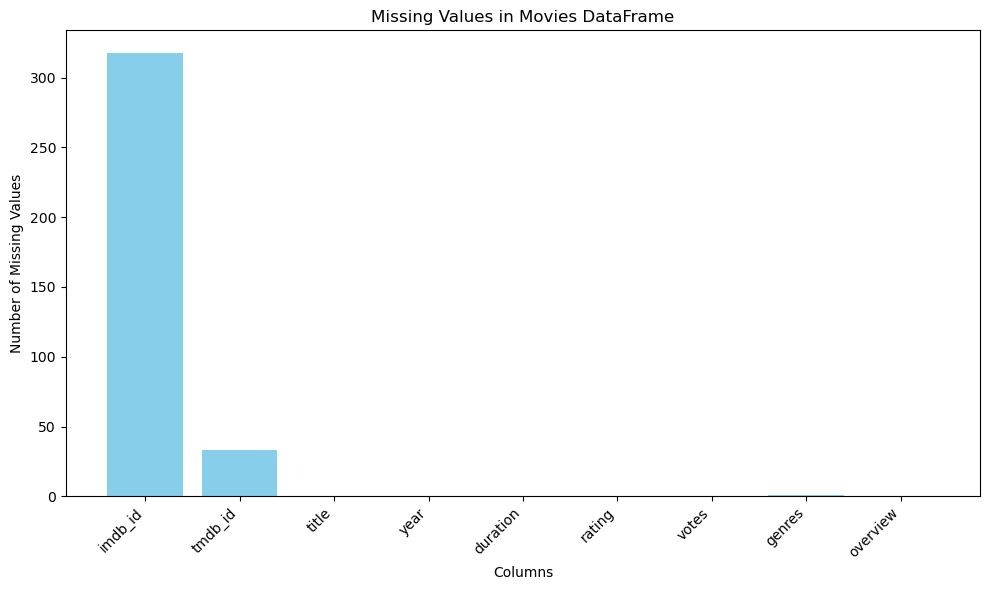

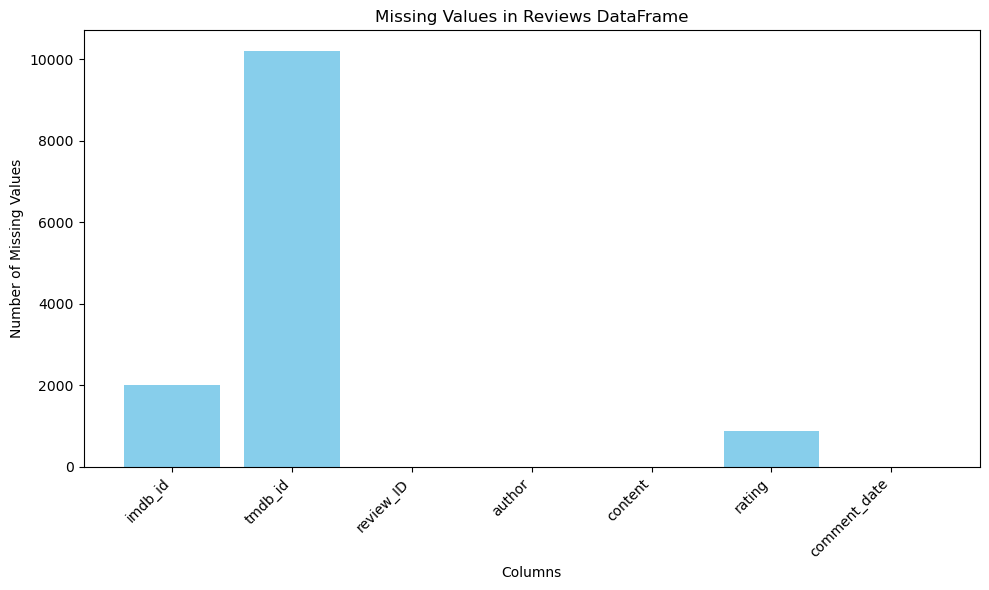

In [5]:
from data_preprocessing_function import visualize_missing_values

# Call the function for the movies DataFrame
visualize_missing_values(movies_df, 'Missing Values in Movies DataFrame')

# Call the function for the reviews DataFrame
visualize_missing_values(reviews_df, 'Missing Values in Reviews DataFrame')

**Movies DataFrame Missing Values Interpretation**

- The chart indicates that the IMDB_id column shows the highest number of missing values, significantly more than any other column. This suggests that many movie records do not have an associated IMDB identifier.
- Additionally, the TMDB_id column also has some missing values, although considerably fewer than IMDB_id. This implies that most of the movie information is sourced from TMDB. <br>
**Reviews DataFrame Missing Values Interpretation**

- In the Reviews DataFrame, the tmdb_id column has the most substantial number of missing values. This suggests that many reviews do not have a linked TMDB movie identifier, possibly indicating that they come from the IMDB database.
- It's worth noting that, except for the rating column, the rest of the columns show no missing values, with only the rating column displaying some null values.

In [6]:
reviews_df.filter((reviews_df['tmdb_id'].isNotNull()) & (reviews_df['rating'].isNotNull())).count()

1497

In [7]:
# Checking for missing values in critical columns including 'Rating'
missing_data_count = reviews_df.select(
    [F.count(F.when(F.isnull(c) | F.col(c).eqNullSafe(""), c)).alias(c) for c in ["Rating"]])
missing_data_count.show()

+------+
|Rating|
+------+
|   878|
+------+



Missing values in the `Rating` column suggests that some users provided reviews without assigning ratings. This absence of ratings may impact the labeling process and needs to be addressed in our analysis pipeline.

#### Duplicate Data Visualisation

Duplicate data occurs when the same data entries are stored in the same data storage system, or across multiple systems. This can happen accidentally due to human error, imported data, or merged datasets. Removing duplicates improves the efficiency and speed of data processing operations.

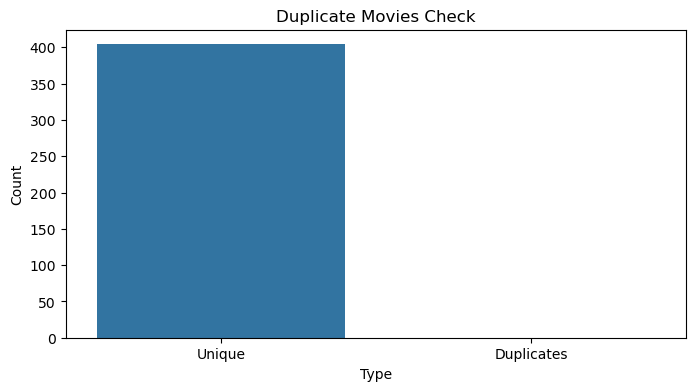

Unique movies: 404
Duplicate movies: 0


In [8]:
from data_preprocessing_function import visualize_duplicates_movies, visualize_duplicates_reviews

unique_movies, duplicate_movies = visualize_duplicates_movies(movies_df)

print("Unique movies:", unique_movies)
print("Duplicate movies:", duplicate_movies)

**Unique Movies:** 404 distinct movies are present in the dataset, meaning each movie appears only once.
**Duplicate Movies:** There are no instances of movies being repeated in the dataset.

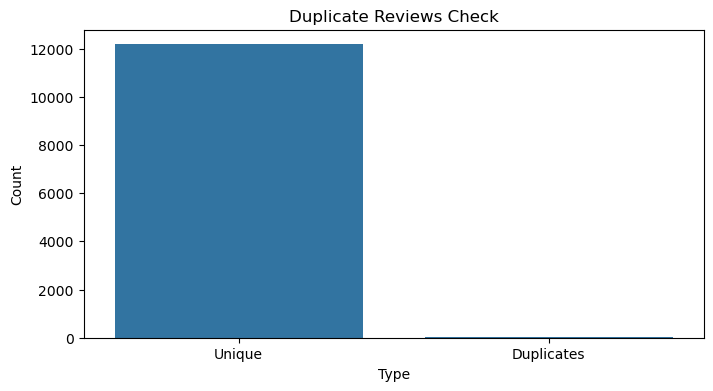

Unique reviews: 12176
Duplicate reviews: 26


In [9]:
unique_reviews, duplicate_reviews = visualize_duplicates_reviews(reviews_df)
print("Unique reviews:", unique_reviews)
print("Duplicate reviews:", duplicate_reviews)

**Unique Reviews:** There are 12,176 individual reviews present in the dataset, with each review being unique.
**Duplicate Reviews:** There are 26 instances where the same review appears more than once in the dataset.

In [10]:
# Find the duplicate reviews based solely on the review_id column
duplicate_reviews_review_id = reviews_df.groupBy("review_id").count().filter(F.col("count") > 1)

# Show the duplicate reviews based solely on the review_id column
if duplicate_reviews_review_id.count() > 0:
    print("Duplicate reviews based solely on review_id:")
    duplicate_reviews_review_id.show(truncate=False)
else:
    print("No duplicates based solely on review_id found.")

Duplicate reviews based solely on review_id:
+------------------------+-----+
|review_id               |count|
+------------------------+-----+
|56b03307c3a3686477000c6a|2    |
|5e3fd6c841465c0016cb0e2a|2    |
|5d77792d5907de000f2c668f|2    |
|653540498cfcc7014c8df727|2    |
|65ce1c383123450147ba0bf4|2    |
|5cf85547c3a3681a561f09d3|2    |
|62dfae6c5ca7040b2ad34eb1|2    |
|5cfd157192514167adb97848|2    |
|5d7e98b4f0647c06629d3575|2    |
|65fad59960620a016325369d|2    |
|63e4e16adb4ed60081220ffd|2    |
|58a197f9c3a36828a800310e|2    |
|577aace4c3a3682008001792|2    |
|58b41af3c3a368527d0148f7|2    |
|62405d1a5a99150090c05c97|2    |
|6458899b77d23b0170370864|2    |
|6458da0c6c849201433f88de|2    |
|63be0da4fa404600c129af19|2    |
|63e3fd35fac50200986d75c6|2    |
|5d1430f99251417581b8593f|2    |
+------------------------+-----+
only showing top 20 rows



The most straightforward approach for duplicates in the dataset is removing them from the dataset. This ensures that each review is unique and prevents any bias or distortion in the analysis.

#### Descriptive Statistics

Descriptive statistics provide a summary of key characteristics of a dataset. They are essential for gaining insights into the distribution, central tendency, and variability of the data.

In [11]:
# Descriptive statistics for numerical columns in movies
movies_df.describe(['Duration', 'Rating', 'Votes']).show()

# Descriptive statistics for reviews
reviews_df.describe(['Rating']).show()

+-------+------------------+------------------+-----------------+
|summary|          Duration|            Rating|            Votes|
+-------+------------------+------------------+-----------------+
|  count|               404|               404|              404|
|   mean|115.91831683168317| 6.857678215102394|51249.66831683168|
| stddev| 29.79101336908391|1.3614789614738345|235940.1405591698|
|    min|                 0|               0.0|                0|
|    max|               206|              10.0|          2926018|
+-------+------------------+------------------+-----------------+

+-------+------------------+
|summary|            Rating|
+-------+------------------+
|  count|             11324|
|   mean| 6.885641116213352|
| stddev|2.5378683725001925|
|    min|                 1|
|    max|                10|
+-------+------------------+



From the descriptive statistics,

**Movies DataFrame:**

***Duration:*** The average duration of movies in the dataset is approximately 115.92 minutes, with a standard deviation of around 29.79 minutes. The shortest movie is listed as 0 minutes, possibly indicating a data entry error, while the longest movie spans 206 minutes.

***Rating:*** The average rating of movies is about 6.86, with a standard deviation of approximately 1.36. Ratings range from 0 to 10, indicating a diverse range of viewer preferences.

***Votes:*** On average, movies received around 51,249 votes, with a significant standard deviation of approximately 235,940. The minimum number of votes is 0, while the maximum exceeds 2.9 million. The 0 vote suggests that there might movies without the reviews.

**Reviews Dataframe:**

***Rating:*** The average rating given in reviews is similar to that of movies, approximately 6.89, with a standard deviation of about 2.54. Ratings in reviews also span from 0.5 to 10, indicating a diverse range of opinions expressed by reviewers.

From the results, we observe that 7 movies have a rating of 0 and no votes, indicating they likely have no reviews. Removing these movies might improve the quality of our analysis as they contribute little information.



#### Distribution of Data

Data distribution is a graphical representation of data collected from a sample or population. It's used to organize and present large amounts of information in a way that's meaningful and simple for audiences to understand. Capturing distributions allows audiences to understand critical statistical properties of the data and help audiences make educated data-driven decisions on key outcomes.

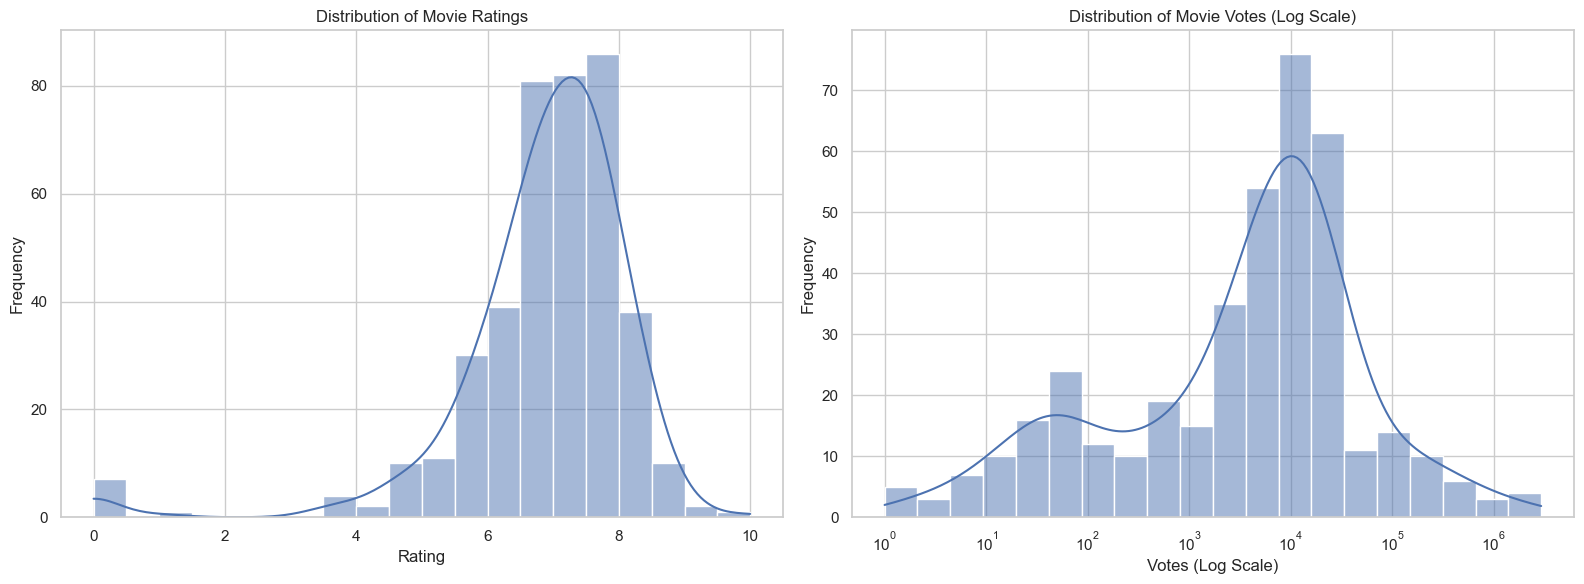

In [12]:
from data_preprocessing_function import visualize_rating_votes, visualize_genre_distribution, \
    visualize_year_distribution

visualize_rating_votes(movies_df)

**Distribution of Movie Ratings**
- The distribution exhibits a right-skewed pattern, indicating that a majority of movies tend to receive relatively positive ratings.
- Peaks around the range of 6.5 to 8 suggest that a significant proportion of movies are rated favorably by audiences, possibly indicating that viewers generally prefer movies with ratings in this range.
- The presence of a placeholder rating of 0 for unrated movies should be considered when analyzing the distribution.

**Distribution of Movie Votes**
- The distribution displays a heavy skewness, with most movies receiving a relatively small number of votes.
- Since the dataset primarily consists of movies from TMDB, which may have a smaller user base compared to more mainstream platforms like IMDB, it's expected to observe fewer votes per movie on average.

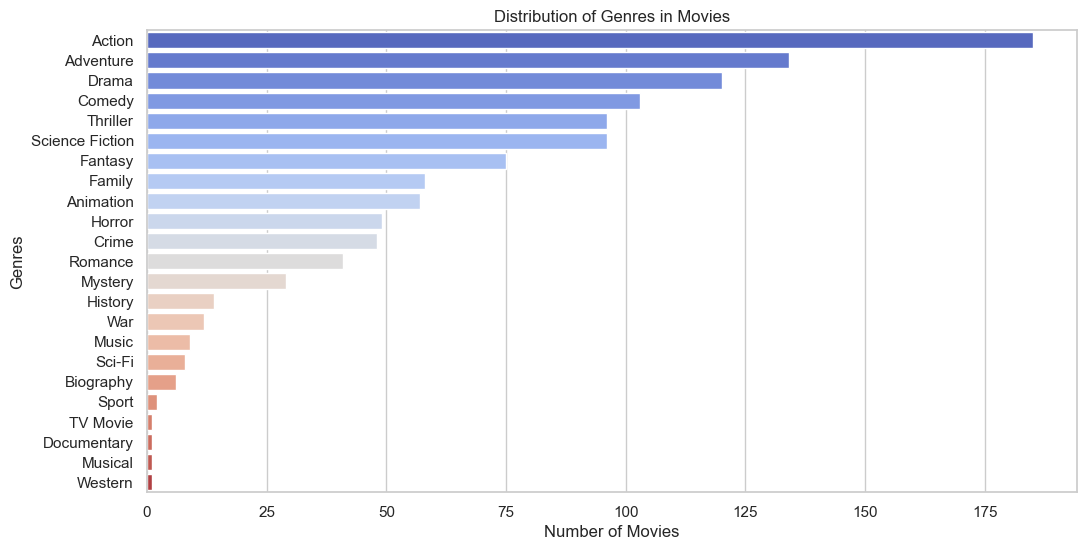

In [13]:
visualize_genre_distribution(movies_df)

**Distribution of Movie Genre**
- Genres such as Action, Adventure, Drama, and Comedy appear to be more prevalent, which aligns with expectations for a general movie dataset. These popular genres often attract larger audiences and may influence the types of reviews and sentiments viewers express.
- Conversely, genres like Western, Musical, and Documentary show relatively lower representation in the dataset. Similarly, genres such as TV Movie, Sport, Biography, Music, War, History, and Mystery also exhibit lower frequencies.
- Genres like Fantasy, Science Fiction, and Thriller appear to fall somewhere in the middle in terms of prevalence, indicating a moderate representation within the dataset. These genres typically attract a dedicated fan base and may elicit varied responses from viewers.
- From the distribution, we can notice that there are repeated genres like Sci-Fi and Science Fiction, as well as music and Musicals.This might be because of the difference in representation in the TMDB and IMDB databases.

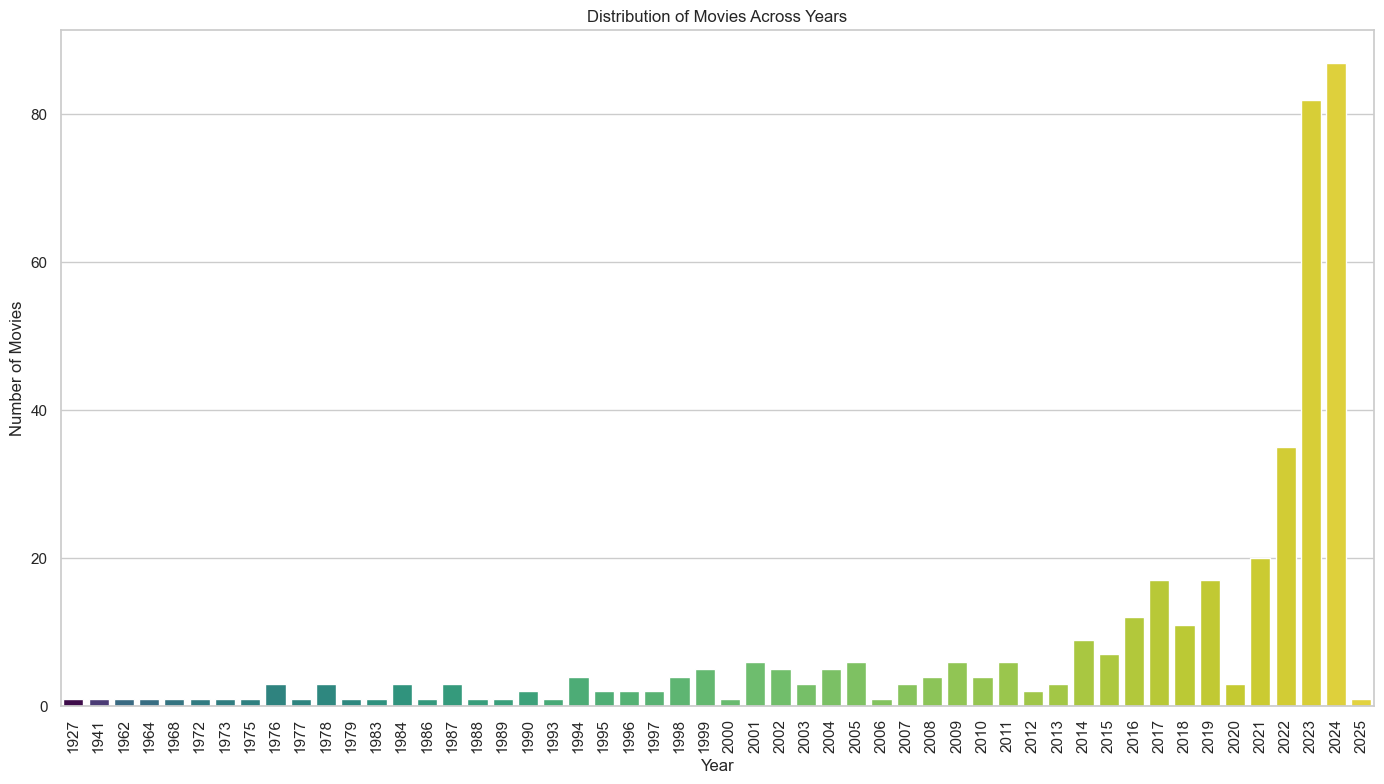

In [14]:
visualize_year_distribution(movies_df)

**Distribution of Movie Year**

- The bar graph illustrates the number of movies released across years, covering the period from 1927 to 2025.
- Notably, there is a substantial spike in the number of movies released in 2023 and 2024, with the count reaching 80. This significant increase is likely influenced by the prevalence of new releases in popular movie lists on platforms like IMDb and TMDB during these years.
- The inclusion of pre-release information for movies in 2025 may have yet to receive reviews as they are still in the pre-release phase.

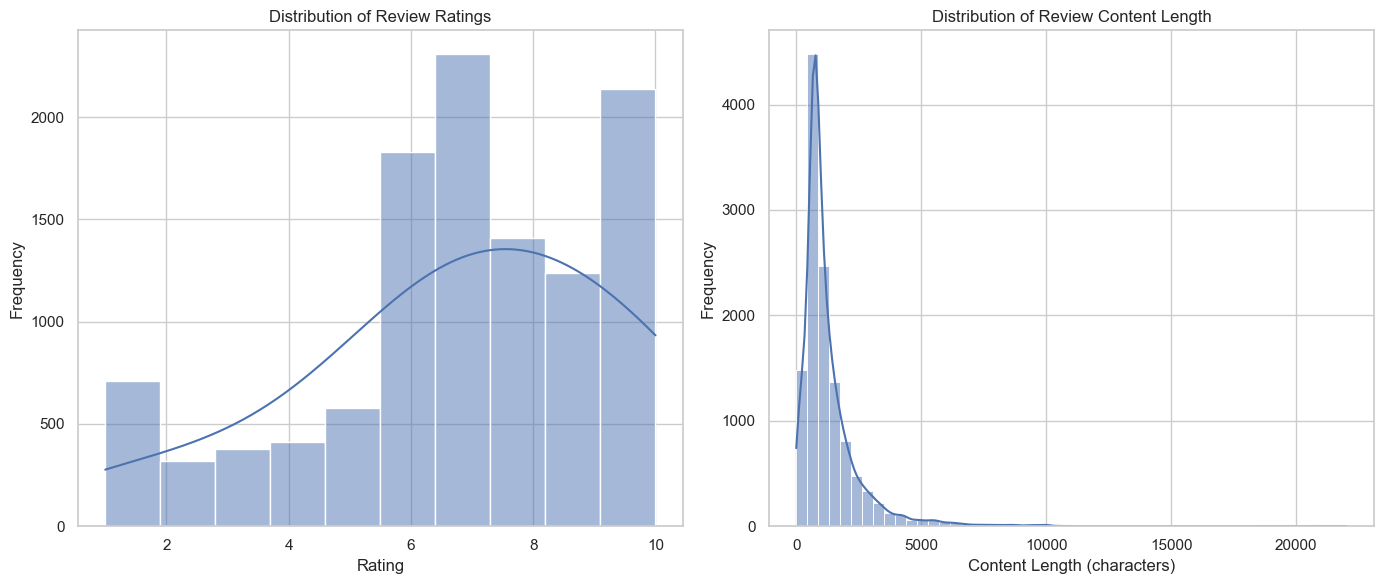

In [15]:
from data_preprocessing_function import visualize_review_rating, visualize_review_year

visualize_review_rating(reviews_df)

**Distribution of Review Ratings**
- The distribution illustrates the frequency of reviews falling into each rating category, offering insights into the overall sentiment of reviewers.
- A notable peak at high rating values suggests a predominantly positive reception among reviewers, indicating that many movies are well-received.
- The presence of dual peaks at 6.5 and 10 indicates a clear positive consensus across popular movies in both IMDB and TMDB databases. This suggests that highly-rated movies tend to receive consistent acclaim from audiences on multiple platforms.

**Distribution of Review Content-Length**:
- This distribution depicts the typical length of reviews written by users, shedding light on the level of detail and engagement in review content.
- A peak at shorter lengths may suggest that some reviewers provide concise feedback, possibly indicating that they don't have extensive elaborations on their positive or negative opinions.
- The gradual decline in frequency after the peak of around 200 characters suggests a decreasing proportion of reviews with shorter lengths, potentially indicating that most reviewers tend to provide more general feedback.
- Despite the declining trend, reviews exceeding 20,000 characters indicate instances where users have provided exceptionally lengthy and detailed feedback, suggesting a high level of engagement or in-depth analysis by certain reviewers.

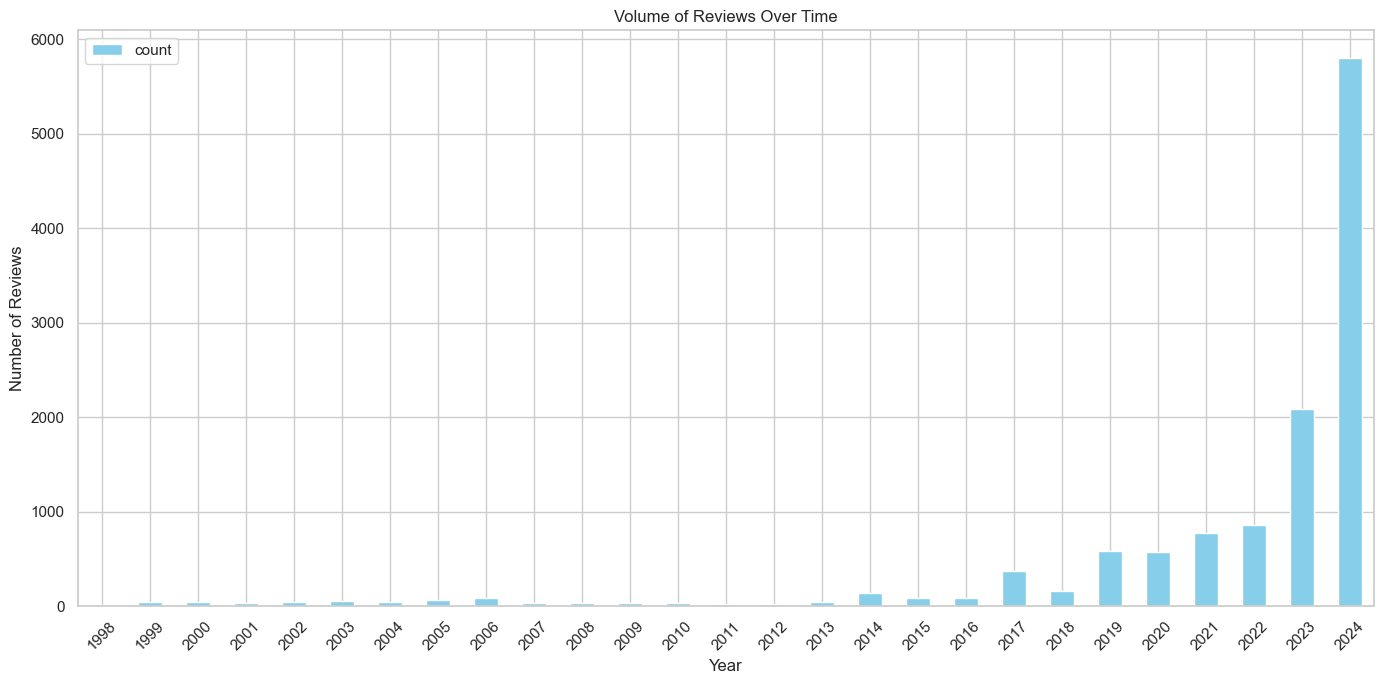

In [16]:
visualize_review_year(reviews_df)

**Review Volumn Over Time**
- The graph presents the volume of reviews from 1998 to 2024.
- Review activity appears relatively low in the early years (1998-2016), indicating limited engagement or data availability during that period.
- The peak in review volume occurs in 2024, the most recent year depicted in the graph.
- The observed correlation between higher review volume and recent years suggests that newer movies tend to attract more attention and generate increased review activity.

### Basic Data Cleaning

In this section, we will perform basic data cleaning based on the issues identified during the previous Exploratory Data Analysis (EDA) phase. The identified problems include:

1. Missing Ratings in User Reviews

2. Movies with 0 Rating and 0 Votes

3. Inconsistent Genre Labels

4. Review DataFrame Duplicates

These cleaning steps are crucial for preparing the data for deeper exploration and text analysis.

##### Remove Missing Ratings in User Reviews
We will exclude reviews that do not have a rating to ensure the integrity and consistency of our sentiment analysis.

In [17]:
# Step 1: Remove reviews without ratings
reviews_df = reviews_df.dropna(subset=['rating'])

# Show output after Step 1: Check again for missing values in 'rating'
print("After removing reviews without ratings, checking remaining missing values:")
reviews_df.select([F.count(F.when(F.col(c).isNull(), c)).alias(c) for c in ['rating']]).show()

After removing reviews without ratings, checking remaining missing values:
+------+
|rating|
+------+
|     0|
+------+



In [18]:
reviews_df.filter(reviews_df['tmdb_id'].isNotNull()).show()

+-------+-------+--------------------+-----------------+--------------------+------+------------+
|imdb_id|tmdb_id|           review_ID|           author|             content|rating|comment_date|
+-------+-------+--------------------+-----------------+--------------------+------+------------+
|   NULL| 693134|65d7b5d191f0ea018...| Manuel São Bento|FULL SPOILER-FREE...|    10|  2024-02-22|
|   NULL| 693134|65e23e2e07e281017...|            r96sk|As anticipated, a...|     9|  2024-03-01|
|   NULL| 693134|65e2da9da67254018...|       CinemaSerf|This is certainly...|     7|  2024-03-02|
|   NULL| 693134|65e62a99fe077a016...|      biancarockr|An absolutely mes...|     9|  2024-03-04|
|   NULL| 693134|65e6d212097c49018...|  Chandler Danier|Great but a littl...|     9|  2024-03-05|
|   NULL| 693134|65ff07cb226c56016...|justhappytobehere|Saw it on the big...|     8|  2024-03-23|
|   NULL| 693134|660c4433d400f3016...|      Roberta1970|I had to watch Du...|     8|  2024-04-02|
|   NULL| 693134|660

##### Remove Movies with 0 Rating and 0 Votes
We will filter out movies that have not received any votes or ratings, focusing the dataset on those that have been actively reviewed.

In [20]:
# Step 2: Remove movies with 0 ratings and 0 votes
movies_df = movies_df.filter((F.col('Rating') > 0) | (F.col('Votes') > 0))

# Show output after Step 2: Check for movies with 'Rating' 0 and 'Votes' 0
print("After removing movies with 0 ratings and 0 votes, checking for remaining movies with 'Rating' 0 and 'Votes' 0:")
movies_df.filter((F.col('Rating') == 0) & (F.col('Votes') == 0)).show()

After removing movies with 0 ratings and 0 votes, checking for remaining movies with 'Rating' 0 and 'Votes' 0:
+-------+-------+-----+----+--------+------+-----+------+--------+
|imdb_id|tmdb_id|title|year|duration|rating|votes|genres|overview|
+-------+-------+-----+----+--------+------+-----+------+--------+
+-------+-------+-----+----+--------+------+-----+------+--------+



##### Standardize Genre Names
We will create a mapping for genre synonyms and apply this mapping to standardize the genre names across the dataset.

In [21]:
# Step 3: Standardize genre names
# Create a mapping expression for genre standardization
genre_expr = """
    array_join(transform(split(Genres, ', '), x ->
        case
            when trim(x) = 'Sci-Fi' then 'Science Fiction'
            when trim(x) = 'Musical' then 'Music'
            else trim(x)
        end), ', ')
"""

movies_df = movies_df.withColumn('genres', F.expr(genre_expr))
movies_df = movies_df.withColumn('genre_list', F.split(F.col('genres'), ',\s*'))

exploded_genres_df = movies_df.select(F.explode(F.col('genre_list')).alias('genre'))
distinct_genres_df = exploded_genres_df.distinct()
distinct_genres_list = [row['genre'] for row in distinct_genres_df.orderBy("genre").collect()]

# Show output after Step 3: Display distinct genres to confirm changes
print("Distinct genres after standardization:")
print(distinct_genres_list)

Distinct genres after standardization:
['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'Sport', 'TV Movie', 'Thriller', 'War', 'Western']


##### Remove Duplicate Reviews
We will remove duplicate reviews to prevent skewed analysis results.

In [22]:
# Step 4: Remove duplicate reviews
reviews_df = reviews_df.dropDuplicates(['review_id'])

# Show output after Step 4: Check for duplicate reviews
print("Checking for duplicates in reviews after removal:")
reviews_df.groupBy('review_id').count().filter("count > 1").show()

Checking for duplicates in reviews after removal:
+---------+-----+
|review_id|count|
+---------+-----+
+---------+-----+



#### Correlation Analysis

Investigate the correlation between numerical variables such as ratings, duration, and votes in the Movies DataFrame. This can help identify relationships between different attributes.

##### Movies Rating vs Votes

In this section, we aim to explore the relationship between movie ratings and the number of votes they receive. Our objective is to determine whether there is a correlation between the rating of a movie and the level of audience engagement.

By analyzing this relationship, we can gain insights into the impact of audience preferences and perceptions on the popularity and perceived quality of movies.

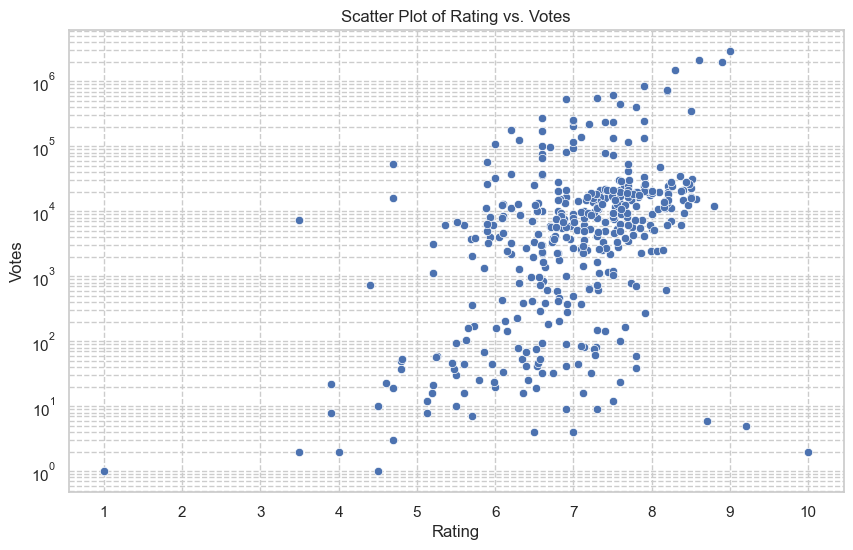

Correlation between Rating and Votes in movies: 0.21626453108639607


In [23]:
from data_preprocessing_function import visualize_rating_vs_votes

visualize_rating_vs_votes(movies_df)

# Correlation between Ratings and Votes in movies
print("Correlation between Rating and Votes in movies:", movies_df.stat.corr('Rating', 'Votes'))

**Correlation between Ratings and Votes**
- The scatter plot shows a positive correlation between the number of ratings and the number of votes received by movies. In this case, it means that movies with higher ratings tend to have more votes, and movies with lower ratings tend to have fewer votes.
-  On the other hand, the coefficient, 0.216, indicates a weaker correlation. The correlation may influence by factors such as popularity bias, which means that popular movies, regardless of their rating, are likely to get more attention and, therefore, more votes.

##### Review Ratings vs Review Length

In this section, we aim to investigate the question: Is there a correlation between review length and rating? Do longer reviews tend to have higher or lower ratings?

By examining this correlation, we can gain insights into how review length may influence or be influenced by the perceived quality or sentiment of the movie.

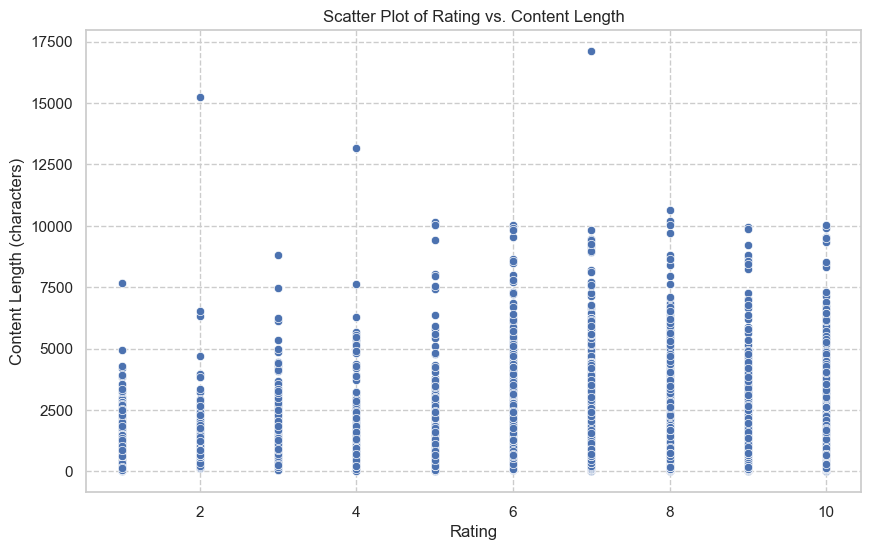

Correlation between Rating and Review Length in movies: 0.02803846603582574


In [24]:
from data_preprocessing_function import visualize_rating_vs_content_length

reviews_df = reviews_df.withColumn('content_length', F.length(F.col('content')))
visualize_rating_vs_content_length(reviews_df)

# Correlation between Ratings and Votes in movies
print("Correlation between Rating and Review Length in movies:", reviews_df.stat.corr('rating', 'content_length'))


**Correlation between Ratings and Review Length**
- The correlation coefficient you provided, 0.028062222952403064, indicates an extremely weak, close to no correlation between movie ratings and review length
- From the scatter plot,it is also difficult to see a clear pattern. There's likely a scattered distribution of review lengths across the entire rating spectrum. This suggests that the length of a review isn't influenced by whether the reviewer liked or disliked the movie.

##### Genre vs Avg Rating

In this section, we aim to explore the relationship between movie genres and their average ratings. Our objective is to analyze whether certain genres tend to receive higher or lower average ratings compared to others.

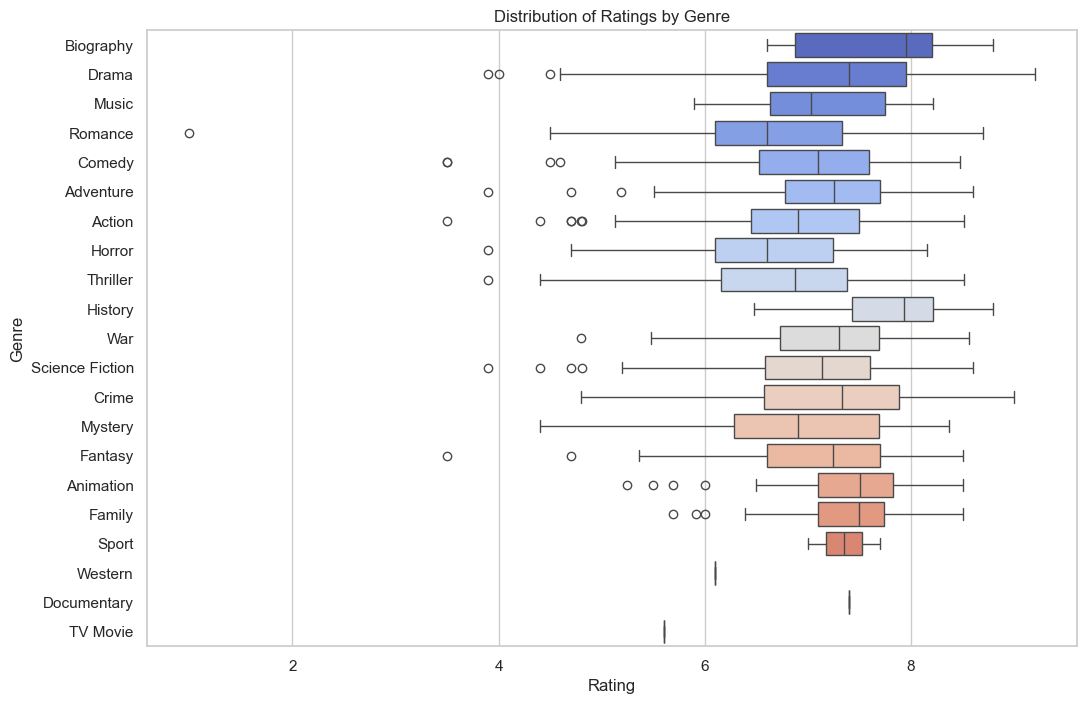

In [25]:
from data_preprocessing_function import visualize_ratings_by_genre

visualize_ratings_by_genre(movies_df)

In [26]:
# Average rating by genre
movies_df.withColumn('Genre', F.explode(F.split('Genres', ', '))) \
    .groupBy('Genre').agg(F.avg('Rating').alias('Avg_Rating')).orderBy('Avg_Rating', ascending=False).show(n=100)

+---------------+------------------+
|          Genre|        Avg_Rating|
+---------------+------------------+
|        History| 7.796857254845755|
|      Biography| 7.683333237965901|
|      Animation| 7.400818183205344|
|    Documentary| 7.400000095367432|
|         Family|7.3556071519851685|
|          Sport| 7.349999904632568|
|          Crime|7.2639583349227905|
|          Drama| 7.235613450282762|
|      Adventure|  7.17101537997906|
|          Music| 7.150900030136109|
|        Fantasy| 7.101109556955834|
|            War| 7.088833411534627|
|Science Fiction| 7.014267331302756|
|         Comedy| 6.912603958998576|
|        Mystery| 6.894586168486496|
|         Action|6.8940218628429975|
|       Thriller|6.7391458203395205|
|        Romance|6.5772999882698056|
|         Horror|  6.53957141175562|
|        Western| 6.099999904632568|
|       TV Movie| 5.599999904632568|
+---------------+------------------+



**Correlation between Ratings and Genres**
- The boxplot might show the distribution of ratings within each genre. A wider spread in ratings could suggest a more diverse audience within that genre, while a narrow spread might indicate a niche audience.
- The table shows the average rating for various movie genres in your dataset. "History" movies have the highest average rating (7.79), while "TV Movie" has the lowest (5.60). However, from the boxplot, the "History" did not show significant audience in voting.
- Overall, a high average rating might indicate critical acclaim or appeal to a niche audience who appreciates that genre. It doesn't necessarily mean the genre is popular among a broader audience.

***In overall, votes, review length, and genres do not show a significant relationship with the rating of the movie.***

### Part 2 Pre-Processing Text Data

Pre-processing text data is the process of cleaning and preparing text for classification. It's an essential step in natural language processing (NLP) that improves data quality, reduces noise, and facilitates effective analysis and modeling.

**Sources:**
- [AnalyticsVidhya](https://www.analyticsvidhya.com/blog/2021/06/text-preprocessing-in-nlp-with-python-codes/)
- [ScienceDirect](https://www.sciencedirect.com/science/article/pii/S1877050913001385/pdf?md5=8988e865336a8424d397a52807361212&pid=1-s2.0-S1877050913001385-main.pdf)

In [27]:
# Check the structure of the dataframe
reviews_df

DataFrame[imdb_id: string, tmdb_id: string, review_ID: string, author: string, content: string, rating: int, comment_date: date, content_length: int]

By showing the structure of the reviews data frame, we found that there is no label, which is the polarity level in our case. Thus, we will perform sentiment labelling in the later section.

In [28]:
# Extract the content column as a Pandas DataFrame
content_df = reviews_df.select('content').toPandas()

# Display the content without the frame
for index, row in content_df.head().iterrows():
    print(f"{row['content']}\n\n")

Neil Gaiman is so contemporarily vital, both in literature and cinema, because he more than anyone else (with the possible exception of Terry Gilliam) notes that children and adults alike are fascinated with what lies outside our observable and tangible realms of existence. He realized the reasons storytelling have been significantly important since the dawn of mankind, and devised, as the Brothers Grimm did, that fairy tales and children's stories had to be haunting and entertaining to be both memorable and timeless. This is a great film depicting the growing sense as a child approaches adolescence that their parents and their world aren't exactly as they seem, and that through their trials and tribulations (the 'rites of passage', if you will) they'll reach the 'happy medium' they need to in order to find true happiness in their lifetimes.

I definitely hope that all of Gaiman's books and graphic novels are made into movies (I most anticipate the 'Miracleman' graphic novels--both tho

Next, after examining the top 5 records in the reviews data frame, we identified several potential preprocessing steps to prepare the text data for analysis:
<br>


1. **Handling Informal Language**:
   - **Contractions**: Expand contractions like "don't" to "do not" for consistency.
   - **Emoticons**: Eliminate emoticons like ":)" to remove subjective emotional cues.

2. **Removing Noise**:
   - **Punctuation**: Consider removing most punctuation except periods and question marks to simplify the text and aid processing.
   - **Special Characters**: Remove emojis, symbols, and extra spaces to streamline the text.
   - **Numbers**: Remove numbers.

3. **Normalization**:
   - **Lowercase**: Convert all text to lowercase to simplify analysis and avoid treating "Good" and "good" as different words.
   - **Stop Words**: Remove common words like "the," "a," "an," etc. (stop words) to focus on relevant terms.
   - **Stemming/Lemmatization**: Reduce words to their root form (e.g., "acting" becomes "act") to capture synonyms and improve analysis accuracy.

#### Sentiment Label Creation

In the previous section, we excluded reviews without ratings and removed duplicate entries from the dataframe. Now, in this section, we will focus on creating sentiment labels for the reviews based on their ratings. To create sentiment labels, we will define thresholds for positive, neutral, and negative ratings based on common sentiment analysis practices. We will then assign sentiment labels to each review based on its rating value relative to these thresholds.

In [29]:
reviews_df = reviews_df.withColumn(
    "sentiment",
    F.when(F.col("rating") <= 2, "Negative")
    .when(F.col("rating") <= 4, "Somewhat Negative")
    .when(F.col("rating") == 5, "Neutral")
    .when(F.col("rating") <= 7, "Somewhat Positive")
    .otherwise("Positive")
)

reviews_df.show()

+-------+-------+--------------------+------------------+--------------------+------+------------+--------------+-----------------+
|imdb_id|tmdb_id|           review_ID|            author|             content|rating|comment_date|content_length|        sentiment|
+-------+-------+--------------------+------------------+--------------------+------+------------+--------------+-----------------+
|   NULL|  14836|         5.72923E+23|        talisencrw|Neil Gaiman is so...|     9|  2016-05-03|          1105|         Positive|
|   NULL|    141|50d321f419c29559d...|      Andres Gomez|Interesting movie...|     7|  2012-12-20|           224|Somewhat Positive|
|   NULL|  49047|5286a24d19c29569b...|      Andres Gomez|Great story, grea...|     9|  2013-11-15|           272|         Positive|
|   NULL|    238|5346fa840e0a265ff...|          futuretv|The Godfather Rev...|    10|  2014-04-10|          2955|         Positive|
|   NULL|     19|538a4cc10e0a2605e...|             Gurre|Metropolis is one..

-- --
#### Text Normalization

Text normalization is the process of transforming text into a single canonical form, which can be useful for natural language processing (NLP) tasks. It involves cleaning and preprocessing text data to make it consistent and usable. Normalizing text before storing or processing it ensures that the input is consistent before operations are performed on it.
<br>
##### Expanding Contractions

Expanding contractions is essential in NLP tasks to ensure accurate text processing and analysis. By expanding contractions, we transform them into their original and explicit forms, allowing NLP models to capture the full meaning of the text.

In [30]:
import contractions
import pandas as pd

# Function to expand contractions
def expand_contractions_text(text):
    if pd.isna(text):
        return text
    try:
        return contractions.fix(text)
    except Exception as e:
        return text  # Return the original text if an error occurs

# Convert Spark DataFrame to pandas DataFrame
pandas_df = reviews_df.toPandas()

# Apply the function to the 'content' column in pandas DataFrame
pandas_df['expanded_content'] = pandas_df['content'].apply(expand_contractions_text)

# Convert the pandas DataFrame back to Spark DataFrame
reviews_df = spark.createDataFrame(pandas_df)

# Show the updated DataFrame
reviews_df.show()

"""
# In Jupyter Notebook
sc.addFile("my_udf.py")

# Correct Import Statement in Jupyter Notebook
from my_udf import TextProcessor

# Using the UDF in Spark DataFrame operations
reviews_df = reviews_df.withColumn("expanded_content", TextProcessor.expand_contractions_udf("content"))
"""

+-------+-------+--------------------+------------------+--------------------+------+------------+--------------+-----------------+--------------------+
|imdb_id|tmdb_id|           review_ID|            author|             content|rating|comment_date|content_length|        sentiment|    expanded_content|
+-------+-------+--------------------+------------------+--------------------+------+------------+--------------+-----------------+--------------------+
|   NULL|  14836|         5.72923E+23|        talisencrw|Neil Gaiman is so...|     9|  2016-05-03|          1105|         Positive|Neil Gaiman is so...|
|   NULL|    141|50d321f419c29559d...|      Andres Gomez|Interesting movie...|     7|  2012-12-20|           224|Somewhat Positive|Interesting movie...|
|   NULL|  49047|5286a24d19c29569b...|      Andres Gomez|Great story, grea...|     9|  2013-11-15|           272|         Positive|Great story, grea...|
|   NULL|    238|5346fa840e0a265ff...|          futuretv|The Godfather Rev...|    

'\n# In Jupyter Notebook\nsc.addFile("my_udf.py")\n\n# Correct Import Statement in Jupyter Notebook\nfrom my_udf import TextProcessor\n\n# Using the UDF in Spark DataFrame operations\nreviews_df = reviews_df.withColumn("expanded_content", TextProcessor.expand_contractions_udf("content"))\n'

In [31]:
from data_preprocessing_function import compare_content_html

compare_content_html(spark,reviews_df, "content", "expanded_content", max_width='1000px', num_results=2)

In the comparison of first record, there are no contractions present in the original content, so there is no change after expanding contractions. While in the second example, the contraction "I've" has been expanded to "I have" in the expanded content.

This expansion ensures consistency and clarity in the text, making it easier to process and understand, especially for applications like sentiment analysis where every word matters.

##### HTML and URL Removal

For HTML and URL removal, we'll use regular expressions with PySpark's regexp_replace function. We'll check if these patterns exist before attempting to remove them to optimize processing.

In [32]:
from IPython.display import display, HTML
# Define regex patterns
html_pattern = "<.*?>"
url_pattern = r"https?://(?:www\.)?[a-zA-Z0-9\-_]+(?:\.[a-zA-Z]{2,})+[:0-9]*[/?][^\s]*|www\.[a-zA-Z0-9\-_]+(?:\.[a-zA-Z]{2,})+[:0-9]*[/?][^\s]*"

reviews_df = reviews_df.withColumn("contains_html", F.expr(f"rlike(expanded_content, '{html_pattern}')"))
reviews_df = reviews_df.withColumn("contains_url", F.expr(f"rlike(expanded_content, '{url_pattern}')"))

# Show rows where HTML tags or URLs are present
if reviews_df.filter("contains_html").count() > 0:
    reviews_df.filter("contains_html").select("expanded_content", "contains_html").show()

if reviews_df.filter("contains_url").count() > 0:
    reviews_df.filter("contains_url").select("expanded_content", "contains_url").show()

# Remove URLs if present and display the updated content
reviews_df = reviews_df.withColumn("text_no_urls", F.when(F.col("contains_url"), F.regexp_replace("expanded_content", url_pattern, "")).otherwise(F.col("expanded_content")))
# Convert to Pandas DataFrame for better visualization in a notebook environment
result_pd = reviews_df.filter("contains_url") \
    .select("expanded_content", "text_no_urls") \
    .limit(5).toPandas()
display(HTML(result_pd.to_html(index=False, escape=False)))

reviews_df = reviews_df.drop("contains_html", "contains_url")

+--------------------+-------------+
|    expanded_content|contains_html|
+--------------------+-------------+
|<b>A long form re...|         true|
|My expectations w...|         true|
|A stunning featur...|         true|
|Always a pleasure...|         true|
|Utterly stunning....|         true|
|I agree <them>'Ca...|         true|
|Solid.\n\n<them>'...|         true|
|One of Disney's b...|         true|
|A step down, but ...|         true|
|My first taste of...|         true|
|<them>'Thor: Ragn...|         true|
|Enjoyed that!\n\n...|         true|
|Very good, it is ...|         true|
|A quality start t...|         true|
|An entertaining (...|         true|
|An outstanding en...|         true|
|A very good, and ...|         true|
|Yeah... pretty po...|         true|
|Full review: <a>h...|         true|
|Chadwick Boseman ...|         true|
+--------------------+-------------+
only showing top 20 rows

+--------------------+------------+
|    expanded_content|contains_url|
+-------------

expanded_content,text_no_urls
"Out of all the films nominated for best picture, there is one that is not getting much attention at all. In Hacksaw Ridge, the narrative surrounding the film does not have much to do the film at all because it is identity seems to be centered on Mel Gibson’s comeback.\n\nRead More: https://reviews.boxofficebuz.com/review/hacksaw-ridge","Out of all the films nominated for best picture, there is one that is not getting much attention at all. In Hacksaw Ridge, the narrative surrounding the film does not have much to do the film at all because it is identity seems to be centered on Mel Gibson’s comeback.\n\nRead More:"
"My expectations were extremely low before this one released. Cannot argue that the Amazing Spider-Man movies are very bad, yet there is always a room for a getting worse. But seriously, Homecoming has completely changed my experience from movies by Marvel x Sony Pictures. It was entertaining and moving. Furthermore, it is as good for re-watch as well, what is a completely new experience for me.","My expectations were extremely low before this one released. Cannot argue that the Amazing Spider-Man movies are very bad, yet there is always a room for a getting worse. But seriously, Homecoming has completely changed my experience from movies by Marvel x <a href="" Pictures. It was entertaining and moving. Furthermore, it is as good for re-watch as well, what is a completely new experience for me."
"‘Godzilla II: King of the Monsters’ promises to build on the great work already laid out for this franchise, mixing popcorn fun and thrilling craft, but instead it relinquishes all of that to be a predictably dull and plodding bore. It does not even manage to be a fun, brainless monster movie, assuming that a satisfying monster battle is all about being big and loud and doing nothing else. We waited five years for the follow-up to ‘Godzilla’, which only makes this new film even more of a disappointment, and does not excuse the badly-written screenplay or the poorly-executed visual effects. With Dougherty handing the reigns over to horror director Adam Wingard for 2020’s ‘Godzilla vs Kong’, here is hoping the Monsterverse finds its feet again.\n- Daniel Lammin\n\nRead Daniel's full article...\nhttps://www.maketheswitch.com.au/article/review-godzilla-2-king-of-the-monsters-the-king-stumbles-in-this-loud-and-blundering-mess","‘Godzilla II: King of the Monsters’ promises to build on the great work already laid out for this franchise, mixing popcorn fun and thrilling craft, but instead it relinquishes all of that to be a predictably dull and plodding bore. It does not even manage to be a fun, brainless monster movie, assuming that a satisfying monster battle is all about being big and loud and doing nothing else. We waited five years for the follow-up to ‘Godzilla’, which only makes this new film even more of a disappointment, and does not excuse the badly-written screenplay or the poorly-executed visual effects. With Dougherty handing the reigns over to horror director Adam Wingard for 2020’s ‘Godzilla vs Kong’, here is hoping the Monsterverse finds its feet again.\n- Daniel Lammin\n\nRead Daniel's full article...\n"
"It is just a shame that 'X-Men' was never able to live up to its potential in this form. Drawn of clichés, a tired script and a tired cast, it is a big wet flop of a film where it looked like the cast were just there to collect their cheques. It is probably something to wait for a digital release and watch on a rainy Sunday afternoon where you can fall asleep during the exhausting middle section and wake up at the mildly less-exhausting end.\n\nIf anyone needs me, I will be looking for Cyclops, hot choccie, blanket and hug.\n- Brent Davidson\n\nRead Brent's full article...\nhttps://www.maketheswitch.com.au/article/review-x-men-dark-phoenix-untapped-potential","It is just a shame that 'X-Men' was never able to live up to its potential in this form. Drawn of clichés, a tired script and 

##### Lowercasing

Converting all text to lowercase ensures consistency and avoids treating "Good" and "good" as different words.

In [33]:
reviews_df = reviews_df.withColumn('lowercase', F.lower(F.col('text_no_urls')))

In [34]:
compare_content_html(spark,reviews_df, "text_no_urls", "lowercase", max_width='1000px', num_results=2)


##### Remove Special Characters and Punctuation

Clean up any characters that aren't alphanumeric to help focus the analysis on meaningful words.

In [35]:
# Remove special characters and punctuation, replace them with a space
reviews_df = reviews_df.withColumn('no_punc', F.regexp_replace(F.col('lowercase'), r'[^\w\s]', ' '))

# Replace multiple spaces with a single space
reviews_df = reviews_df.withColumn('no_punc', F.regexp_replace(F.col('no_punc'), r'\s+', ' '))

In [36]:
compare_content_html(spark,reviews_df, "lowercase", "no_punc", max_width='1000px', num_results=2)

##### Remove Number

Numbers can be removed from text if the use case doesn't require them to be considered. For example, numbers may be useful for text that contains product ratings or while analyzing financial data. However, in our context, numbers don't help in sentiment recognition.

In [37]:
# Remove numbers
reviews_df = reviews_df.withColumn('no_num_content', F.regexp_replace(F.col('no_punc'), r'\d+', ''))

reviews_df = reviews_df.withColumn('cleaned_content', F.trim(F.col('no_num_content')))

In [38]:
compare_content_html(spark,reviews_df, "no_punc", "cleaned_content", max_width='1000px', num_results=2)

The preprocessing steps aim to clean and standardize the text data, making it more suitable for downstream tasks such as sentiment analysis. By converting text to lowercase, removing numbers, special characters, and punctuation, and trimming spaces, the resulting text is easier to process and analyze. These steps help remove noise from the text data and focus on the essential textual content, potentially improving the performance of sentiment analysis algorithms.

#### Tokenization

This process breaks down the text into individual units like words or sentences. This is crucial for the analysis because most NLP techniques operate on a word level.

In [39]:
# Create a regex tokenizer object
regexTokenizer = RegexTokenizer(inputCol="cleaned_content", outputCol="tokens", pattern="\\W")

# Apply the tokenizer to the DataFrame
reviews_df = regexTokenizer.transform(reviews_df)

In [40]:
from data_preprocessing_function import display_content_html
display_content_html(spark, reviews_df, 'tokens', max_width='1000px', num_results=2)

From the tokenised result, the text has been successfully tokenised into individual words. However, many common words like "a", "the", "not", etc., are present, indicating the presence of stopwords.

#### N-grams Creation

An n-gram is a sequence of n adjacent symbols in a text document, such as words, numbers, symbols, or punctuation. N-grams can be as short as one word (unigram) or as long as multiple words (bigram, trigram, etc.). N-gram models are useful in many text analytics applications where sequences of words are relevant, such as in sentiment analysis, text classification, and text generation. N-grams capture the contextual information and relationships between words in a given text.

In [41]:
from pyspark.ml.feature import NGram

# Add Bigrams
ngram2 = NGram(n=2, inputCol="tokens", outputCol="bigrams")
reviews_df = ngram2.transform(reviews_df)

# Add Trigrams
ngram3 = NGram(n=3, inputCol="tokens", outputCol="trigrams")
reviews_df = ngram3.transform(reviews_df)

In [42]:
display_content_html(spark, reviews_df, 'bigrams', max_width='1000px', num_results=1)
display_content_html(spark, reviews_df, 'trigrams', max_width='1000px', num_results=1)

In the first example, we use bigrams, which the pairs of words appear together in the text. For example, "time travel" or "sci-fi" might be common bigrams in a review of science fiction movies. They provide insight into the context and topics discussed.

The second example shows trigrams, which consist of sequences of three words that frequently occur together. They can capture more complex patterns in the text compared to bigrams. Trigrams help identify recurring phrases or patterns that might not be as obvious with bigrams alone. For instance, "time travel sets" or "use of technology" could be common trigrams in a similar movie review.

#### POS Tagging

Part-of-speech (POS) tagging is a natural language processing (NLP) technique that assigns a grammatical category to each word in a sentence. This process is also known as grammatical tagging.

In [43]:
import nltk
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')

# Convert Spark DataFrame to Pandas DataFrame
pandas_df = reviews_df.toPandas()

# Define a function to apply POS tagging
def apply_pos_tags(tokens):
    return pos_tag(tokens)

# Apply POS tagging using Pandas apply method
pandas_df['pos_tags'] = pandas_df['tokens'].apply(apply_pos_tags)

# Convert the Pandas DataFrame back to Spark DataFrame
reviews_df = spark.createDataFrame(pandas_df)

# Apply POS tagging UDF on tokenized text
# df = df.withColumn("pos_tags", TextProcessor.pos_tag_text_udf(df.tokens))


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\wr431\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [44]:
from data_preprocessing_function import display_content_html_direct
display_content_html_direct(spark, reviews_df, 'pos_tags', max_width='1000px', num_results=2)

The provided text examples have been subjected to part-of-speech (POS) tagging. In the first example, words like "the," "time," "sci-fi," and "interesting" are identified as a determiner, noun, noun, and adjective, respectively. Similarly, verbs like "found," "display," and "are" are tagged as past tense, present tense, and present tense, respectively. Other parts of speech such as adverbs, conjunctions, and prepositions are also identified. This tagging provides valuable insights into the grammatical structure of the text, aiding in tasks like sentiment analysis, named entity recognition, and text summarization. The second example follows the same pattern, with words like "under," "rated," and "sci-fi" being identified as preposition, verb (past participle), and noun, respectively. This information is crucial for understanding the syntactic and semantic nuances of the text, enabling more accurate and effective natural language processing tasks.

#### Stopword Removal

Stopwords are common words that typically do not carry significant meaning in text analysis and can be safely removed. Examples include "the", "and", "is", etc. After identifying the stopwords, they can be removed from the tokenized text to focus on the more meaningful content.

In [45]:
# Create a StopWordsRemover object
stopwords_remover = StopWordsRemover(inputCol="tokens", outputCol="filtered_tokens")

# Apply the remover to the DataFrame
reviews_df = stopwords_remover.transform(reviews_df)

In [46]:
compare_content_html(spark,reviews_df, "tokens", "filtered_tokens", max_width='1000px', num_results=2)

After removing stopwords from the tokenized text of both comparisons, the resulting processed content provides a condensed and focused representation of the original reviews. It retains essential terms and phrases related to the movie reviews, such as plot details, character descriptions, thematic elements, and overall sentiments. By eliminating redundant stopwords, the processed content delivers a more concise summary of the reviews, making it easier to extract key insights and themes without unnecessary filler words.

#### Stemming and Lemmatization

Stemming and lemmatization are both text processing techniques used in natural language processing (NLP) to reduce words to their base or root form. Stemming removes prefixes or suffixes from words to achieve word stems, while lemmatization reduces words to their base form, known as the lemma.

Stemming is faster than lemmatization because it chops off word endings without considering linguistic context. However, stemming can lead to unmeaningful common base roots. Lemmatization is more accurate but can be computationally more expensive than stemming. For example, stemming might return "boats" and "boating" for the word "boat", while lemmatization might return either "see" or "saw" depending on whether the token is used as a verb or a noun.

**Sources:**
- [AnalyticsVidhya](https://www.analyticsvidhya.com/blog/2022/06/stemming-vs-lemmatization-in-nlp-must-know-differences/)
- [DataCamp](https://www.datacamp.com/tutorial/stemming-lemmatization-python)
- [TowardsDataScience](https://towardsdatascience.com/stemming-vs-lemmatization-2daddabcb221)

**For the experiment purpose, we will use 4 types of stemming techniques, including WordNet Lemmatizer, TextBlob Lemmatizer, PorterStemmer, and SnowballStemmer, to normalize the words in the corpus. These techniques reduce words to their base or root form, which can aid in tasks like text analysis and natural language processing.**

In [47]:

# # # Apply lemmatize UDF
# # reviews_df = reviews_df.withColumn("lemmatized_tokens", TextProcessor.wn_lemmatize_text_udf(reviews_df.filtered_tokens))
# # reviews_df = reviews_df.withColumn("lemmatized_tokens", TextProcessor.tb_lemmatize_text_udf(reviews_df.filtered_tokens))

# # # Apply stemming UDF
# # reviews_df = reviews_df.withColumn("porter_stemmed_tokens", TextProcessor.porter_stem_text_udf(reviews_df.filtered_tokens))
# # reviews_df = reviews_df.withColumn("snowball_stemmed_tokens", TextProcessor.snowball_stem_text_udf(reviews_df.filtered_tokens))

In [48]:
import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer, SnowballStemmer
from textblob import TextBlob
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Lemmatization using WordNet
def lemmatize_tokens(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in tokens]

# Lemmatization using Textblob
def textblob_lemmatize_tokens(tokens):
    text = " ".join(tokens)
    blob = TextBlob(text)
    return [word.lemmatize() for word in blob.words]

# Stemming using Porter Stemmer
def porter_stem_tokens(tokens):
    stemmer = PorterStemmer()
    return [stemmer.stem(token) for token in tokens]

# Stemming using Snowball Stemmer
def snowball_stem_tokens(tokens):
    stemmer = SnowballStemmer('english')
    return [stemmer.stem(token) for token in tokens]


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\wr431\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\wr431\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\wr431\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\wr431\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [49]:
# Assuming 'reviews_df' is your Spark DataFrame with a column 'filtered_tokens'
pandas_df = reviews_df.toPandas()

# Apply the lemmatization functions
pandas_df['wn_lemmatized_tokens'] = pandas_df['filtered_tokens'].apply(lemmatize_tokens)
pandas_df['tb_lemmatized_tokens'] = pandas_df['filtered_tokens'].apply(textblob_lemmatize_tokens)

# Apply the stemming functions
pandas_df['porter_stemmed_tokens'] = pandas_df['filtered_tokens'].apply(porter_stem_tokens)
pandas_df['snowball_stemmed_tokens'] = pandas_df['filtered_tokens'].apply(snowball_stem_tokens)

# Convert back to Spark DataFrame
reviews_df = spark.createDataFrame(pandas_df)

In [50]:
from data_preprocessing_function import compare_text_processing

compare_text_processing(reviews_df, num_rows=3,
                        WordNet_Lemmatization='wn_lemmatized_tokens',
                        TextBlob_Lemmatization='tb_lemmatized_tokens',
                        Porter_Stemming='porter_stemmed_tokens',
                        Snowball_Stemming='snowball_stemmed_tokens')

Original Text,WordNet_Lemmatization,TextBlob_Lemmatization,Porter_Stemming,Snowball_Stemming
['neil' 'gaiman' 'contemporarily' 'vital' 'literature' 'cinema' 'anyone' 'else' 'possible' 'exception' 'terry' 'gilliam' 'notes' 'children' 'adults' 'alike' 'fascinated' 'lies' 'outside' 'observable' 'tangible' 'realms' 'existence' 'realized' 'reasons' 'storytelling' 'significantly' 'important' 'since' 'dawn' 'mankind' 'devised' 'brothers' 'grimm' 'fairy' 'tales' 'children' 'stories' 'haunting' 'entertaining' 'memorable' 'timeless' 'great' 'film' 'depicting' 'growing' 'sense' 'child' 'approaches' 'adolescence' 'parents' 'world' 'exactly' 'seem' 'trials' 'tribulations' 'rites' 'passage' 'reach' 'happy' 'medium' 'need' 'order' 'find' 'true' 'happiness' 'lifetimes' 'definitely' 'hope' 'gaiman' 'books' 'graphic' 'novels' 'made' 'movies' 'anticipate' 'miracleman' 'graphic' 'novels' 'alan' 'moore' 'ones' 'well' 'written' 'truly' 'comic' 'book' 'movies' 'worth' 'watching'],['neil' 'gaiman' 'contemporarily' 'vital' 'literature' 'cinema' 'anyone' 'else' 'possible' 'exception' 'terry' 'gilliam' 'note' 'child' 'adult' 'alike' 'fascinated' 'lie' 'outside' 'observable' 'tangible' 'realm' 'existence' 'realized' 'reason' 'storytelling' 'significantly' 'important' 'since' 'dawn' 'mankind' 'devised' 'brother' 'grimm' 'fairy' 'tale' 'child' 'story' 'haunting' 'entertaining' 'memorable' 'timeless' 'great' 'film' 'depicting' 'growing' 'sense' 'child' 'approach' 'adolescence' 'parent' 'world' 'exactly' 'seem' 'trial' 'tribulation' 'rite' 'passage' 'reach' 'happy' 'medium' 'need' 'order' 'find' 'true' 'happiness' 'lifetime' 'definitely' 'hope' 'gaiman' 'book' 'graphic' 'novel' 'made' 'movie' 'anticipate' 'miracleman' 'graphic' 'novel' 'alan' 'moore' 'one' 'well' 'written' 'truly' 'comic' 'book' 'movie' 'worth' 'watching'],['neil' 'gaiman' 'contemporarily' 'vital' 'literature' 'cinema' 'anyone' 'else' 'possible' 'exception' 'terry' 'gilliam' 'note' 'child' 'adult' 'alike' 'fascinated' 'lie' 'outside' 'observable' 'tangible' 'realm' 'existence' 'realized' 'reason' 'storytelling' 'significantly' 'important' 'since' 'dawn' 'mankind' 'devised' 'brother' 'grimm' 'fairy' 'tale' 'child' 'story' 'haunting' 'entertaining' 'memorable' 'timeless' 'great' 'film' 'depicting' 'growing' 'sense' 'child' 'approach' 'adolescence' 'parent' 'world' 'exactly' 'seem' 'trial' 'tribulation' 'rite' 'passage' 'reach' 'happy' 'medium' 'need' 'order' 'find' 'true' 'happiness' 'lifetime' 'definitely' 'hope' 'gaiman' 'book' 'graphic' 'novel' 'made' 'movie' 'anticipate' 'miracleman' 'graphic' 'novel' 'alan' 'moore' 'one' 'well' 'written' 'truly' 'comic' 'book' 'movie' 'worth' 'watching'],['neil' 'gaiman' 'contemporarili' 'vital' 'literatur' 'cinema' 'anyon' 'els' 'possibl' 'except' 'terri' 'gilliam' 'note' 'children' 'adult' 'alik' 'fascin' 'lie' 'outsid' 'observ' 'tangibl' 'realm' 'exist' 'realiz' 'reason' 'storytel' 'significantli' 'import' 'sinc' 'dawn' 'mankind' 'devis' 'brother' 'grimm' 'fairi' 'tale' 'children' 'stori' 'haunt' 'entertain' 'memor' 'timeless' 'great' 'film' 'depict' 'grow' 'sens' 'child' 'approach' 'adolesc' 'parent' 'world' 'exactli' 'seem' 'trial' 'tribul' 'rite' 'passag' 'reach' 'happi' 'medium' 'need' 'order' 'find' 'true' 'happi' 'lifetim' 'definit' 'hope' 'gaiman' 'book' 'graphic' 'novel' 'made' 'movi' 'anticip' 'miracleman' 'graphic' 'novel' 'alan' 'moor' 'one' 'well' 'written' 'truli' 'comic' 'book' 'movi' 'worth' 'watch'],['neil' 'gaiman' 'contemporarili' 'vital' 'literatur' 'cinema' 'anyon' 'els' 'possibl' 'except' 'terri' 'gilliam' 'note' 'children' 'adult' 'alik' 'fascin' 'lie' 'outsid' 'observ' 'tangibl' 'realm' 'exist' 'realiz' 'reason' 'storytel' 'signific' 'import' 'sinc' 'dawn' 'mankind' 'devis' 'brother' 'grimm' 'fairi' 'tale' 'children' 'stori' 'haunt' 'entertain' 'memor' 'timeless' 'great' 'film' 'depict' 'grow' 'sens' 'child' 'approach' 'adolesc' 'parent' 'world' 'exact' 'seem' 'trial' 'tribul' 'rite' 'passag' 'reach' 'happi' 'medium' 'need' 'orde

***Summary of Stemming vs. Lemmatization***

****Record 1:****
- Both stemming and lemmatization techniques are applied to reduce words to their base or dictionary form.
- Stemming tends to be more aggressive, reducing words to their root form.
- Lemmatization accurately retains semantic meaning, preserving words in their base or dictionary form.
- Snowball stemming appears slightly more aggressive than Porter stemming.

****Record 2:****
- Both stemming and lemmatization successfully reduce words to their base forms.
- Stemming reduces words to their root form, while lemmatization preserves the original word.
- Lemmatization retains the original meaning more accurately than stemming.
- Porter and Snowball stemming yield similar results.

****Record 3:****
- Both stemming and lemmatization techniques successfully reduce words to their base forms.
- Lemmatization maintains the original meaning better than stemming.
- Porter and Snowball stemming techniques produce similar results, with Snowball stemming being slightly more aggressive in some cases.

In summary, while both stemming and lemmatization aim to reduce words to their base forms, lemmatization tends to preserve semantic meaning better. However, stemming is more aggressive and may lead to the loss of some semantic nuances. Additionally, both Porter and Snowball stemming techniques produce similar results, with Snowball stemming being slightly more aggressive in some cases.


### Text Encoding

Text encoding is the process of converting human-readable characters into a format that machines can understand. This is achieved by assigning each character in a character set to a numeric value, which is then interpreted by the computer as visible characters. In natural language processing (NLP), text encoding is crucial as it converts meaningful text into numerical representations, such as numbers and vectors, while preserving the context between words and sentences. This enables machines to analyze patterns in text and understand the context of sentences.

**Sources:**
- [Medium - NLP Text Encoding: A Beginner's Guide](https://medium.com/analytics-vidhya/nlp-text-encoding-a-beginners-guide-fa332d715854)
- [Medium - All You Need to Know About Text Encoding](https://medium.com/@himankbh/all-you-need-to-know-about-text-encoding-af173935939)

**To make the experiment more comprehensive, alongside using different stemming and lemmatizing techniques, we also include various text encoding techniques:**

- **Bags of Words (BoW)**: Represents text as a sparse matrix of word occurrences, ignoring word order.
- **Term Frequency-Inverse Document Frequency (TF-IDF)**: Weighs the importance of words in a document relative to a corpus.
- **Word2Vec**: Represents words as dense vectors in a continuous vector space, capturing semantic similarities.


In [51]:
from pyspark.ml.feature import CountVectorizer, IDF, HashingTF, Word2Vec
from pyspark.ml import Pipeline

def get_vectorizers(inputCol):
    # CountVectorizer (BoW)
    cv = CountVectorizer(inputCol=inputCol, outputCol=inputCol + "_cv")

    # TF-IDF
    hashingTF = HashingTF(inputCol=inputCol, outputCol=inputCol + "_rawFeatures", numFeatures=20)
    idf = IDF(inputCol=inputCol + "_rawFeatures", outputCol=inputCol + "_features")

    # Word2Vec
    word2Vec = Word2Vec(vectorSize=100, minCount=0, inputCol=inputCol, outputCol=inputCol + "_word2vec")

    # Pipeline for streamline transformation
    pipeline = Pipeline(stages=[cv, hashingTF, idf, word2Vec])
    return pipeline

# Apply to each type of tokenized content
for token_type in ['wn_lemmatized_tokens', 'tb_lemmatized_tokens', 'porter_stemmed_tokens', 'snowball_stemmed_tokens']:
    pipeline = get_vectorizers(token_type)
    model = pipeline.fit(reviews_df)
    reviews_df = model.transform(reviews_df)


In [52]:
reviews_df.select('wn_lemmatized_tokens_cv', 'wn_lemmatized_tokens_rawFeatures', 'wn_lemmatized_tokens_features', 'wn_lemmatized_tokens_word2vec').show(n=5)

+-----------------------+--------------------------------+-----------------------------+-----------------------------+
|wn_lemmatized_tokens_cv|wn_lemmatized_tokens_rawFeatures|wn_lemmatized_tokens_features|wn_lemmatized_tokens_word2vec|
+-----------------------+--------------------------------+-----------------------------+-----------------------------+
|   (37655,[0,1,2,6,9...|            (20,[0,2,3,4,5,6,...|         (20,[0,2,3,4,5,6,...|         [-0.0249563925207...|
|   (37655,[0,61,107,...|            (20,[2,6,7,8,9,14...|         (20,[2,6,7,8,9,14...|         [0.00931141969254...|
|   (37655,[6,11,27,3...|            (20,[0,1,3,7,8,9,...|         (20,[0,1,3,7,8,9,...|         [0.00408219080418...|
|   (37655,[0,1,2,4,7...|            (20,[0,1,2,3,4,5,...|         (20,[0,1,2,3,4,5,...|         [0.00689720090866...|
|   (37655,[0,1,2,6,8...|            (20,[0,1,2,3,4,5,...|         (20,[0,1,2,3,4,5,...|         [-0.0146029543205...|
+-----------------------+-----------------------

From the structure of the reviews dataframe, we can notice for each stemmed and lemmatized tokens, they got 4 more types of vector representations.

- ..._cv: Vector representing the tokens after CountVectorizer transformation.
- ..._rawFeatures: Vector representing the raw features by HashingTF before transformation.
- ..._features: Vector representing the features after IDF  transformation.
- ..._word2vec: Vector representing the tokens after Word2Vec transformation.

-- --

In [53]:
movies_df

DataFrame[imdb_id: string, tmdb_id: string, title: string, year: int, duration: int, rating: float, votes: int, genres: string, overview: string, genre_list: array<string>]

In [54]:
reviews_df

DataFrame[imdb_id: string, tmdb_id: string, review_ID: string, author: string, content: string, rating: int, comment_date: date, content_length: int, sentiment: string, expanded_content: string, text_no_urls: string, lowercase: string, no_punc: string, no_num_content: string, cleaned_content: string, tokens: array<string>, bigrams: array<string>, trigrams: array<string>, pos_tags: array<array<string>>, filtered_tokens: array<string>, wn_lemmatized_tokens: array<string>, tb_lemmatized_tokens: array<string>, porter_stemmed_tokens: array<string>, snowball_stemmed_tokens: array<string>, wn_lemmatized_tokens_cv: vector, wn_lemmatized_tokens_rawFeatures: vector, wn_lemmatized_tokens_features: vector, wn_lemmatized_tokens_word2vec: vector, tb_lemmatized_tokens_cv: vector, tb_lemmatized_tokens_rawFeatures: vector, tb_lemmatized_tokens_features: vector, tb_lemmatized_tokens_word2vec: vector, porter_stemmed_tokens_cv: vector, porter_stemmed_tokens_rawFeatures: vector, porter_stemmed_tokens_featu

Data Preparation

Prepare POS Tags for TF-IDF

In [55]:
from pyspark.ml.feature import HashingTF, IDF

reviews_df = reviews_df.withColumn(
    "pos",
    F.expr("transform(pos_tags, tag -> tag[1])")
)

# # Apply TF-IDF on POS tags
# hashingTF_pos = HashingTF(inputCol="pos", outputCol="rawFeatures_pos", numFeatures=100)
# idf_pos = IDF(inputCol="rawFeatures_pos", outputCol="features_pos")

Prepare Bag of Ngrams (BoN)

In BoN, instead of counting occurrences of individual words as in BoW, the model counts occurrences of n-grams (sequences of n words) within the text.

In [56]:
# from pyspark.ml.feature import CountVectorizer
#
# # CountVectorizer for Bigrams (BoB)
# cv_bigrams = CountVectorizer(inputCol="bigrams", outputCol="features_bigrams", vocabSize=100, minDF=2)
#
# # CountVectorizer for Trigrams (BoT)
# cv_trigrams = CountVectorizer(inputCol="trigrams", outputCol="features_trigrams", vocabSize=100, minDF=2)

Prepare the Label in Numberic

In [57]:
# from pyspark.ml.feature import StringIndexer
#
# # Assuming your sentiment labels are in a column named "sentiment_label"
# indexer = StringIndexer(inputCol="sentiment_label", outputCol="label_indexed")

###Preapare Data

In [58]:
# from pyspark.sql import DataFrame
# from pyspark.ml import PipelineModel
# from pyspark.ml.feature import HashingTF, IDF, CountVectorizer, StringIndexer, VectorAssembler
# from pyspark.ml.classification import LinearSVC
# from pyspark.ml import Pipeline
#
# def run_pipeline(feature_set: list, train_df: DataFrame, label_col: str = "sentiment", max_iter: int = 10, reg_param: float = 0.1) -> tuple:
#     indexer = StringIndexer(inputCol=label_col, outputCol="label_indexed")
#     train_df = indexer.fit(train_df).transform(train_df)
#
#     # Feature transformations
#     hashingTF_pos = HashingTF(inputCol="pos", outputCol="rawFeatures_pos", numFeatures=100)
#     idf_pos = IDF(inputCol="rawFeatures_pos", outputCol="features_pos")
#
#     cv_bigrams = CountVectorizer(inputCol="bigrams", outputCol="features_bigrams", vocabSize=100, minDF=2)
#     cv_trigrams = CountVectorizer(inputCol="trigrams", outputCol="features_trigrams", vocabSize=100, minDF=2)
#
#     assembler = VectorAssembler(
#         inputCols=feature_set + ["features_pos", "features_bigrams", "features_trigrams"],
#         outputCol="features"
#     )
#
#     svm = LinearSVC(labelCol="label_indexed", featuresCol="features", maxIter=max_iter, regParam=reg_param)
#
#     pipeline = Pipeline(stages=[indexer, hashingTF_pos, idf_pos, cv_bigrams, cv_trigrams, assembler, svm])
#
#     try:
#         model = pipeline.fit(train_df)
#         return model, pipeline, indexer
#     except Exception as e:
#         print(f"Error in pipeline execution: {str(e)}")
#         return None, None, None


In [59]:
# from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
#
# def evaluate_model(model: PipelineModel, indexer, test_df: DataFrame, label_col: str = "sentiment") -> dict:
#     test_df = indexer.transform(test_df)
#
#     test_transformed = model.transform(test_df)
#
#     binary_evaluator = BinaryClassificationEvaluator(labelCol=label_col + "_index", rawPredictionCol="rawPrediction", metricName="areaUnderROC")
#     classification_evaluator = MulticlassClassificationEvaluator(labelCol=label_col + "_index", predictionCol="prediction")
#
#     auc = binary_evaluator.evaluate(test_transformed)
#     accuracy = classification_evaluator.evaluate(test_transformed, {classification_evaluator.metricName: "accuracy"})
#     f1 = classification_evaluator.evaluate(test_transformed, {classification_evaluator.metricName: "f1"})
#     precision = classification_evaluator.evaluate(test_transformed, {classification_evaluator.metricName: "weightedPrecision"})
#     recall = classification_evaluator.evaluate(test_transformed, {classification_evaluator.metricName: "weightedRecall"})
#
#     results = {
#         "AUC": auc,
#         "Accuracy": accuracy,
#         "F1 Score": f1,
#         "Precision": precision,
#         "Recall": recall
#     }
#
#     for metric, value in results.items():
#         print(f"{metric}: {value}")
#
#     return results


In [60]:
# from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
# from pyspark.ml.evaluation import BinaryClassificationEvaluator
#
# # Define the evaluator
# evaluator = BinaryClassificationEvaluator(labelCol="label_indexed", rawPredictionCol="rawPrediction", metricName="areaUnderROC")
#
# # Define parameter grid for hyperparameter tuning
# paramGrid = ParamGridBuilder() \
#     .addGrid(svm.maxIter, [10, 20]) \
#     .addGrid(svm.regParam, [0.1, 0.01]) \
#     .build()
#
# # Setup CrossValidator
# crossval = CrossValidator(
#     estimator=pipeline,
#     estimatorParamMaps=paramGrid,
#     evaluator=evaluator,
#     numFolds=5,  # Number of folds in k-fold cross-validation
#     parallelism=2  # Number of threads to use when running parallel algorithms
# )


In [61]:
feature_sets = {
    "WN Lemmatization + CV": ["wn_lemmatized_tokens_cv"],
    "WN Lemmatization + TF-IDF": ["wn_lemmatized_tokens_features"],
    "WN Lemmatization + Word2Vec": ["wn_lemmatized_tokens_word2vec"],
    "TB Lemmatization + CV": ["tb_lemmatized_tokens_cv"],
    "TB Lemmatization + TF-IDF": ["tb_lemmatized_tokens_features"],
    "TB Lemmatization + Word2Vec": ["tb_lemmatized_tokens_word2vec"],
    "Porter Stemming + CV": ["porter_stemmed_tokens_cv"],
    "Porter Stemming + TF-IDF": ["porter_stemmed_tokens_features"],
    "Porter Stemming + Word2Vec": ["porter_stemmed_tokens_word2vec"],
    "Snowball Stemming + CV": ["snowball_stemmed_tokens_cv"],
    "Snowball Stemming + TF-IDF": ["snowball_stemmed_tokens_features"],
    "Snowball Stemming + Word2Vec": ["snowball_stemmed_tokens_word2vec"]
}

train_df, test_df = reviews_df.randomSplit([0.8, 0.2], seed=42)

In [62]:
# from pyspark.ml.evaluation import MulticlassClassificationEvaluator
# from pyspark.ml.feature import StringIndexer, VectorAssembler
# from pyspark.ml.classification import LogisticRegression
#
# def create_pipeline(feature_set, label_col="sentiment"):
#     indexer = StringIndexer(inputCol=label_col, outputCol="label_indexed")
#     hashingTF_pos = HashingTF(inputCol="pos", outputCol="rawFeatures_pos", numFeatures=100)
#     idf_pos = IDF(inputCol="rawFeatures_pos", outputCol="features_pos")
#     cv_bigrams = CountVectorizer(inputCol="bigrams", outputCol="features_bigrams", vocabSize=100, minDF=2)
#     cv_trigrams = CountVectorizer(inputCol="trigrams", outputCol="features_trigrams", vocabSize=100, minDF=2)
#     assembler = VectorAssembler(
#         inputCols=feature_set + ["features_pos", "features_bigrams", "features_trigrams"],
#         outputCol="features"
#     )
#     lr = LogisticRegression(labelCol="label_indexed", featuresCol="features", maxIter=10, regParam=0.1)
#     pipeline = Pipeline(stages=[indexer, hashingTF_pos, idf_pos, cv_bigrams, cv_trigrams, assembler, lr])
#     return pipeline
#
# # Create the pipeline
# pipeline = create_pipeline(["wn_lemmatized_tokens_features"])
#
# # Train the model
# model = pipeline.fit(train_df)  # train_df should be your training dataset
#
# # Evaluate the model on the test set
# predictions = model.transform(test_df)  # test_df should be your testing dataset
#
# evaluator = MulticlassClassificationEvaluator(labelCol="label_indexed", predictionCol="prediction", metricName="accuracy")
# accuracy = evaluator.evaluate(predictions)
# print(f"Accuracy: {accuracy}")


In [63]:
# from pyspark.ml.evaluation import MulticlassClassificationEvaluator
# from pyspark.ml.feature import StringIndexer, VectorAssembler
# from pyspark.ml.classification import LogisticRegression, RandomForestClassifier
#
# def create_pipeline(feature_set, label_col="sentiment"):
#     indexer = StringIndexer(inputCol=label_col, outputCol="label_indexed")
#     hashingTF_pos = HashingTF(inputCol="pos", outputCol="rawFeatures_pos", numFeatures=100)
#     idf_pos = IDF(inputCol="rawFeatures_pos", outputCol="features_pos")
#     cv_bigrams = CountVectorizer(inputCol="bigrams", outputCol="features_bigrams", vocabSize=100, minDF=2)
#     cv_trigrams = CountVectorizer(inputCol="trigrams", outputCol="features_trigrams", vocabSize=100, minDF=2)
#     assembler = VectorAssembler(
#         inputCols=feature_set + ["features_pos", "features_bigrams", "features_trigrams"],
#         outputCol="features"
#     )
#
#     # Use RandomForestClassifier for multi-class classification
#     rf = RandomForestClassifier(labelCol="label_indexed", featuresCol="features", numTrees=20, maxDepth=5)
#
#     pipeline = Pipeline(stages=[indexer, hashingTF_pos, idf_pos, cv_bigrams, cv_trigrams, assembler, rf])
#     return pipeline
#
# # Create the pipeline
# pipeline = create_pipeline(["wn_lemmatized_tokens_features"])
#
# # Train the model
# model = pipeline.fit(train_df)  # train_df should be your training dataset
#
# # Evaluate the model on the test set
# predictions = model.transform(test_df)  # test_df should be your testing dataset
#
# evaluator = MulticlassClassificationEvaluator(labelCol="label_indexed", predictionCol="prediction", metricName="accuracy")
# accuracy = evaluator.evaluate(predictions)
# print(f"Accuracy: {accuracy}")


In [64]:
# from pyspark.sql import SparkSession
# from pyspark.ml import Pipeline
# from pyspark.ml.classification import RandomForestClassifier
# from pyspark.ml.feature import HashingTF, IDF, CountVectorizer, StringIndexer, VectorAssembler
# from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
# from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
#
# def create_pipeline(feature_set, label_col="sentiment"):
#     # Create instances of the preprocessing stages
#     indexer = StringIndexer(inputCol=label_col, outputCol="label_indexed")
#     hashingTF_pos = HashingTF(inputCol="pos", outputCol="rawFeatures_pos", numFeatures=100)
#     idf_pos = IDF(inputCol="rawFeatures_pos", outputCol="features_pos")
#     cv_bigrams = CountVectorizer(inputCol="bigrams", outputCol="features_bigrams", vocabSize=100, minDF=2)
#     cv_trigrams = CountVectorizer(inputCol="trigrams", outputCol="features_trigrams", vocabSize=100, minDF=2)
#
#     # Assemble features
#     assembler = VectorAssembler(
#         inputCols=feature_set + ["features_pos", "features_bigrams", "features_trigrams"],
#         outputCol="features"
#     )
#
#     # Use RandomForestClassifier for multi-class classification
#     rf = RandomForestClassifier(labelCol="label_indexed", featuresCol="features", numTrees=20, maxDepth=5)
#
#     # Define the stages of the pipeline
#     pipeline = Pipeline(stages=[indexer, hashingTF_pos, idf_pos, cv_bigrams, cv_trigrams, assembler, rf])
#     return pipeline, rf
#
# # Assuming 'reviews_df' is already loaded and available
# train_df, test_df = reviews_df.randomSplit([0.8, 0.2], seed=42)
#
# # Define feature sets as needed
# feature_set = ["wn_lemmatized_tokens_features"]  # Example feature set
#
# # Create the pipeline
# pipeline, rf = create_pipeline(feature_set)
#
# # Setup CrossValidator with parameter grid
# paramGrid = ParamGridBuilder() \
#     .addGrid(rf.numTrees, [10, 20, 30]) \
#     .addGrid(rf.maxDepth, [5, 10, 15]) \
#     .build()
#
# evaluator = MulticlassClassificationEvaluator(labelCol="label_indexed", predictionCol="prediction", metricName="accuracy")
#
# crossval = CrossValidator(
#     estimator=pipeline,
#     estimatorParamMaps=paramGrid,
#     evaluator=evaluator,
#     numFolds=5,
#     parallelism=2
# )
#
# # Run cross-validation, and choose the best set of parameters.
# cvModel = crossval.fit(train_df)
#
# # Fetch the best model
# bestModel = cvModel.bestModel
#
# # Function to evaluate the model
# def evaluate_model(model, data):
#     predictions = model.transform(data)
#     evaluator = MulticlassClassificationEvaluator(labelCol="label_indexed", predictionCol="prediction", metricName="accuracy")
#     return evaluator.evaluate(predictions)
#
# # Evaluate the best model on the test set
# results = evaluate_model(bestModel, test_df)
# print(f"Accuracy: {results}")

In [65]:
movies_df

DataFrame[imdb_id: string, tmdb_id: string, title: string, year: int, duration: int, rating: float, votes: int, genres: string, overview: string, genre_list: array<string>]

In [66]:
reviews_df

DataFrame[imdb_id: string, tmdb_id: string, review_ID: string, author: string, content: string, rating: int, comment_date: date, content_length: int, sentiment: string, expanded_content: string, text_no_urls: string, lowercase: string, no_punc: string, no_num_content: string, cleaned_content: string, tokens: array<string>, bigrams: array<string>, trigrams: array<string>, pos_tags: array<array<string>>, filtered_tokens: array<string>, wn_lemmatized_tokens: array<string>, tb_lemmatized_tokens: array<string>, porter_stemmed_tokens: array<string>, snowball_stemmed_tokens: array<string>, wn_lemmatized_tokens_cv: vector, wn_lemmatized_tokens_rawFeatures: vector, wn_lemmatized_tokens_features: vector, wn_lemmatized_tokens_word2vec: vector, tb_lemmatized_tokens_cv: vector, tb_lemmatized_tokens_rawFeatures: vector, tb_lemmatized_tokens_features: vector, tb_lemmatized_tokens_word2vec: vector, porter_stemmed_tokens_cv: vector, porter_stemmed_tokens_rawFeatures: vector, porter_stemmed_tokens_featu

In [67]:
reviews_df1 = reviews_df

In [68]:
reviews_df1.select("imdb_id", "tmdb_id", "review_ID", "author", "content", "rating", "comment_date", "content_length", "sentiment", "expanded_content", "text_no_urls", "lowercase", "no_punc", "no_num_content", "cleaned_content", "tokens", "bigrams", "trigrams", "pos_tags", "filtered_tokens", "wn_lemmatized_tokens", "tb_lemmatized_tokens", "porter_stemmed_tokens", "snowball_stemmed_tokens")

DataFrame[imdb_id: string, tmdb_id: string, review_ID: string, author: string, content: string, rating: int, comment_date: date, content_length: int, sentiment: string, expanded_content: string, text_no_urls: string, lowercase: string, no_punc: string, no_num_content: string, cleaned_content: string, tokens: array<string>, bigrams: array<string>, trigrams: array<string>, pos_tags: array<array<string>>, filtered_tokens: array<string>, wn_lemmatized_tokens: array<string>, tb_lemmatized_tokens: array<string>, porter_stemmed_tokens: array<string>, snowball_stemmed_tokens: array<string>]

In [69]:
reviews_pandas = reviews_df1.toPandas()